In [9]:
features_map = {
    "e_mvaTTH": ['e ttH MVA', 30, 0, 1],
    "m_mvaTTH": ['$\mu$ ttH MVA', 30, 0, 1],
    "mva": ['BDT Discriminator', 30, 0, 1],
    "e_m_Mass": ['$m_{e\mu}$ [GeV]', 50, 110, 160],
    "met": ['$E^{miss}_{T}$ [GeV]', 30, 0, 200],
    "eEta": ['$\eta^{e}$', 30, -2.5, 2.5],
    "mEta": ['$\eta^{\mu}$', 30, -2.5, 2.5],
    "abseEta": ['$|\eta^{e}|$', 30, -2.5, 2.5],
    "absmEta": ['$|\eta^{\mu}|$', 30, -2.5, 2.5],
    "mpt": ['$p_{T}^{\mu}$', 30, 30, 200], 
    "ept": ['$p_{T}^{e}$', 180, 20, 200], 
    "mpt_Per_e_m_Mass": ['$p_{T}^{\mu}/m_{e\mu}$', 30, 0.15, 1], 
    "ept_Per_e_m_Mass": ['$p_{T}^{e}/m_{e\mu}$', 30, 0.15, 1], 
    "empt": ['$p_{T}^{e\mu}$ [GeV]', 30, 0, 200],
    "emEta": ['$\eta^{e\mu}$', 30, -6, 6], 
    "DeltaEta_e_m": ['$\Delta \eta[e, \mu]$', 30, 0, 3.5], 
    "DeltaPhi_e_m": ['$\Delta \phi[e, \mu]$', 30, 0, 3.2], 
    "DeltaPhi_em_met": ['$\Delta \phi[e\mu, MET]$', 30, 0, 3.2], 
    "DeltaR_e_m": ['$\Delta R[e, \mu]$', 30, 0, 4.5], 
    "e_met_mT": ['$m_{T}[e, MET]$', 30, 0, 250], 
    "m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "e_m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "pZeta85": ['$p_{\zeta}$ [GeV]', 50, -150, 150], 
    "pZeta15": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZeta": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZetaVis": ['$p^{vis}_{\zeta}$ [GeV]', 550, -200, 350],
    "j1pt": ['$p_{T}^{j_{1}}$ [GeV]', 30, 30, 250], 
    "j1Eta": ['$\eta^{j_{1}}$', 30, -5, 5], 
    "absj1Eta": ['$|\eta^{j_{1}}|$', 30, 0, 5], 
    "DeltaEta_j1_em": ['$\Delta \eta[j_{1}, e\mu]$', 40, 0, 6], 
    "DeltaPhi_j1_em": ['$\Delta \phi[j_{1}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j1_em": ['$\Delta R[j_{1}, e\mu]$', 80, 0, 8],
    "j2pt": ['$p_{T}^{j_{2}}$ [GeV]', 30, 30, 100], 
    "j2Eta": ['$\eta^{j_{2}}$', 30, -5, 5], 
    "absj2Eta": ['$\eta^{j_{2}}$', 30, 0, 5],
    "j1_j2_mass": ['$m_{j_{1}j_{2}}$ [GeV]', 30, 0.001, 450], 
    "DeltaEta_em_j1j2": ['$\Delta \eta[j_{1}j_{2}, e\mu]$', 40, 0, 6], 
    "DeltaPhi_em_j1j2": ['$\Delta \phi[j_{1}j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_em_j1j2": ['$\Delta R[j_{1}j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j2_em": ['$\Delta \eta[j_{2}, e\mu]$', 50, 0, 5], 
    "DeltaPhi_j2_em": ['$\Delta \phi[j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j2_em": ['$\Delta R[j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j1_j2": ['$\Delta \eta[j_{1}, j_{2}]$', 30, 0, 4.5], 
    "DeltaPhi_j1_j2": ['$\Delta \phi[j_{1}, j_{2}]$', 30, 0, 3.2], 
    "DeltaR_j1_j2": ['$\Delta R[j_{1}, j_{2}]$', 30, 0, 7], 
    "Zeppenfeld": ['$\eta^{e\mu}-(\eta^{j_{1}}+\eta^{j_{2}})/2$', 30, -5, 5], 
    "Zeppenfeld_DeltaEta": [r'Zeppenfeld variable', 30, -6, 6], 
    "absZeppenfeld_DeltaEta": ['', 100, -5, 5], 
    "cen": ['', 50, 0, 1.2], 
    "Rpt": ['$R_{p_{T}}$', 30, 0, 0.8], 
    "Rpt2": ['$R_{p_{T}}$', 30, 0, 0.8], 
    "pt_cen": ['', 100, 0, 1], 
    "pt_cen_Deltapt": [r'$p_{T}$-centrality', 30, 0, 1.5], 
    "abspt_cen_Deltapt": ['', 100, 0, 1], 
    "Ht_had": ['$H_{T}$ [GeV]', 40, 60, 600], 
    "Ht": ['$H_{T}$ [GeV]', 50, 0, 600],  
    "njets": ['Number of jets', 6, 0, 6],
}

In [1]:
#!/usr/bin/python
import numpy as np
import pandas as pd
import ROOT as r
import matplotlib.pyplot as plt 
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
import multiprocessing

import time
from datetime import timedelta
from my_roc_auc3 import my_roc_auc
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The xgboost version is {}.'.format(xgb.__version__))

#Get total no of avaliable threads
nthreads = multiprocessing.cpu_count()

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++   -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.24/02
The scikit-learn version is 0.24.2.
The xgboost version is 1.4.0.


In [2]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2016preVFP', '2017', '2016postVFP','2018']
var_dict = {}
for year in years:
    print(f'Processing {year}')
    for subsample in ['signal','diboson','tt','others']:
        result = load(f"../results/{year}/makeDF/output_testv9_{subsample}.coffea")
        if isinstance(result,tuple):
            result = result[0]
        for varName in result:
            if varName in var_dict:
                var_dict[varName] = np.append(var_dict[varName],result[varName].value)
            else:
                var_dict[varName] = result[varName].value
df = pd.DataFrame(var_dict).drop(['is2016preVFP', 'is2016postVFP', 'is2017', 'is2018'], axis=1)
df = df[df['opp_charge']==1].drop(['opp_charge'], axis=1)

Processing 2016preVFP
Processing 2017
Processing 2016postVFP
Processing 2018


In [3]:
df['absj1Eta'] = df['j1Eta'].abs()
df['absj2Eta'] = df['j2Eta'].abs()
df['abseEta'] = df['eEta'].abs()
df['absmEta'] = df['mEta'].abs()

In [4]:
data_cuts = df[(df['e_m_Mass']>115)&(df['e_m_Mass']<135)]
data_vbf = data_cuts[(data_cuts.isVBFcat==0)]# & (data_cuts.mtrigger==1)]

In [20]:
data_vbf['absweight'] = data_vbf['weight'].abs()
data_vbf['absweight'].loc[data_vbf['label']==1] /= data_vbf[data_vbf['label']==1]['e_m_Mass_reso']

# split data into X and y
X = data_vbf
Y = data_vbf['label']

# split data into train and tsest sets
seed = 123
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
#X_train_pos, X_test_pos, y_train_pos, y_test_pos = X_train[X_train['weight']>0], X_test[X_test['weight']>0], y_train[X_train['weight']>0], y_test[X_test['weight']>0]
X_train_pos, X_test_pos, y_train_pos, y_test_pos = X_train, X_test, y_train, y_test

#Rescale signal weight to bkg weight
total_bkg_train_weights = X_train_pos.loc[X_train_pos['label'] == 0]['absweight'].sum()
total_sig_train_weights = X_train_pos.loc[X_train_pos['label'] == 1]['absweight'].sum()
sig_to_bkg_ratio = total_bkg_train_weights/total_sig_train_weights
print('Total Bkg Training weights', 'Total Sig Training weights')
print(total_bkg_train_weights, total_sig_train_weights)
print(sig_to_bkg_ratio)

/tmp/ipykernel_1286823/2745196990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vbf['absweight'] = data_vbf['weight'].abs()
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Total Bkg Training weights Total Sig Training weights
17650.843285215415 13000.082412900696
1.3577485684013444


In [21]:
feature_names = ['abseEta', 'absmEta', 'njets', 'met', 'j1pt', 'absj1Eta', 'Ht_had', 'empt', 'DeltaEta_e_m', 'DeltaPhi_em_met', 'DeltaEta_j1_em', 'Rpt', 'pt_cen_Deltapt']#, 'j2pt', 'absj2Eta', 'DeltaEta_j1_j2', 'j1_j2_mass'
#'abseEta', 'absmEta', 

In [22]:
# Train with the default model to select features
tic = time.time()
model = xgb.XGBClassifier(n_jobs=nthreads, objective='binary:logistic', scale_pos_weight=sig_to_bkg_ratio, max_depth=3)#, reg_lambda=10, reg_alpha=10, seed=123, learning_rate=0.1, n_estimators=50)
model.fit(X_train_pos[feature_names], y_train_pos, early_stopping_rounds=10, sample_weight=X_train_pos['absweight'], eval_set = [(X_train_pos[feature_names], y_train_pos), (X_test_pos[feature_names], y_test_pos)], eval_metric='auc', sample_weight_eval_set = [X_train_pos['absweight'], X_test_pos['absweight']], verbose=True)
toc = time.time()
print("Time spent on training %s"%str(timedelta(seconds=toc - tic)))
print(model)

#Check the auc
results = model.evals_result()
print ("AUC of training set: %f"%results['validation_0']['auc'][-1])
print ("AUC of testing set: %f"%results['validation_1']['auc'][-1])
print('Difference: %.2f'%((results['validation_0']['auc'][-1]-results['validation_1']['auc'][-1])*100/(results['validation_0']['auc'][-1]+results['validation_1']['auc'][-1])))

#Modify features in the cell above accordingly and run again

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80287	validation_1-auc:0.79842
[1]	validation_0-auc:0.81438	validation_1-auc:0.81015
[2]	validation_0-auc:0.82247	validation_1-auc:0.81867
[3]	validation_0-auc:0.82803	validation_1-auc:0.82431
[4]	validation_0-auc:0.83033	validation_1-auc:0.82682
[5]	validation_0-auc:0.83700	validation_1-auc:0.83386
[6]	validation_0-auc:0.84096	validation_1-auc:0.83718
[7]	validation_0-auc:0.84492	validation_1-auc:0.84166
[8]	validation_0-auc:0.84622	validation_1-auc:0.84290
[9]	validation_0-auc:0.84960	validation_1-auc:0.84665
[10]	validation_0-auc:0.85185	validation_1-auc:0.84855
[11]	validation_0-auc:0.85330	validation_1-auc:0.85004
[12]	validation_0-auc:0.85417	validation_1-auc:0.85096
[13]	validation_0-auc:0.85537	validation_1-auc:0.85199
[14]	validation_0-auc:0.85649	validation_1-auc:0.85285
[15]	validation_0-auc:0.85754	validation_1-auc:0.85375
[16]	validation_0-auc:0.85822	validation_1-auc:0.85432
[17]	validation_0-auc:0.85885	validation_1-auc:0.85451
[18]	validation_0-au

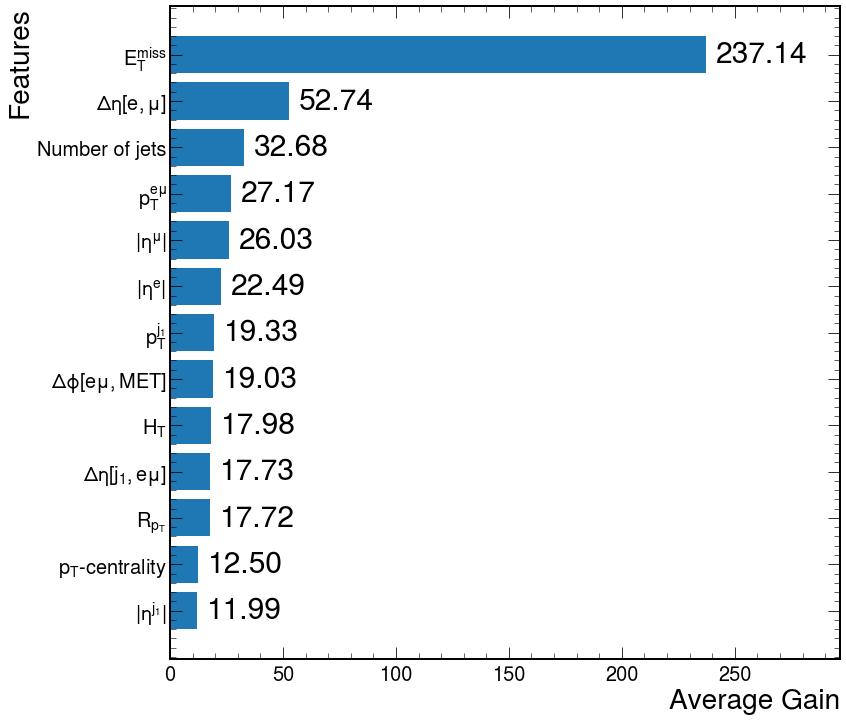

In [23]:
#Check variable importance
catcatcat='ggH'
importances_dict = model.get_booster().get_score(importance_type='gain')
fnames = [*importances_dict]
importances = list(importances_dict.values())
sorted_importance = [y for y, x in sorted(zip(importances, fnames), key=lambda pair: pair[0])]
sorted_features = [x for y, x in sorted(zip(importances, fnames), key=lambda pair: pair[0])]
fig, ax = plt.subplots(figsize=(12,12))
plt.rcParams.update({
    'font.size': 30,
    'axes.titlesize': 24,
    'axes.labelsize': 28,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.title_fontsize': 20
})
bars = plt.barh(range(len(sorted_importance)), sorted_importance, tick_label=[features_map[i][0].replace(' [GeV]','') for i in sorted_features])#, height=0.5)
plt.xlim(0, max(sorted_importance)*1.25)
ax.bar_label(bars, fmt='%.2f', padding=10)
ax.set_xlabel('Average Gain')
ax.set_ylabel('Features')
plt.show()
#fig.savefig(f'plots/BDTValid/{catcatcat}_importance_eta.png',bbox_inches='tight')

In [24]:
X_train['mva'] = model.predict_proba(X_train[feature_names])[:,1]
X_test['mva'] = model.predict_proba(X_test[feature_names])[:,1]
X['mva'] = model.predict_proba(X[feature_names])[:,1]
print('Train', my_roc_auc(y_train.to_numpy(), X_train['mva'].to_numpy(), X_train['weight'].to_numpy()))
print('Test', my_roc_auc(y_test.to_numpy(), X_test['mva'].to_numpy(), X_test['weight'].to_numpy()))
print('Overall', my_roc_auc(Y.to_numpy(), X['mva'].to_numpy(), X['weight'].to_numpy()))

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/tmp/ipykernel_1286823/2125479340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['mva'] = model.predict_proba(X_train[feature_names])[:,1]
/tmp/ipykernel_1286823/2125479340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['m

Train 0.8588991064868412
Test 0.8524850183534634
Overall 0.8569530510944992


In [18]:
catcatcat2 = 'ggH cat'
catcatcat = 'gg'

0.07981176557424773
0.8614563562813942
TFile**		Overtraining.root	
 TFile*		Overtraining.root	
  KEY: TH1D	Bkg Testing Samples;1	A.U.
  KEY: TH1D	Signal Testing Samples;1	A.U.
  KEY: TH1D	Bkg Training Samples;1	A.U.
  KEY: TH1D	Signal Training Samples;1	A.U.
Chi2 = 62.350080, Prob = 0.0798118, NDF = 48, igood = 0
Chi2 = 38.432652, Prob = 0.861456, NDF = 49, igood = 0


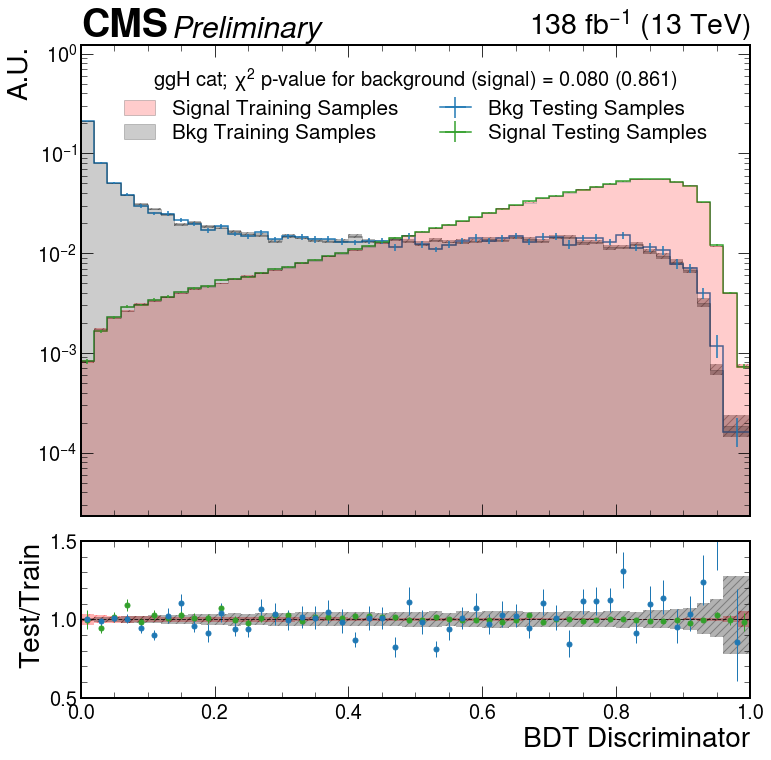

In [25]:
import mplhep
import math

%matplotlib inline

from coffea import hist
df_test = X.loc[X_test.index, ['mva','label','weight']]
df_train = X.loc[X_train.index, ['mva','label','weight']]
df_test_bkg = df_test[df_test['label']==0]
df_train_bkg = df_train[df_train['label']==0]
df_test_signal = df_test[df_test['label']==1]
df_train_signal = df_train[df_train['label']==1]

binning = 50
og_bin = hist.Bin('MVA', 'BDT Discriminator', binning, 0., 1.).edges()

h = hist.Hist('A.U.', hist.Bin('MVA', 'BDT Discriminator', binning, 0., 1.), hist.Cat("sample", "sample"))
h.fill(MVA=df_test_bkg['mva'].to_numpy(), sample='Bkg Testing Samples', weight=df_test_bkg['weight'].to_numpy())
h.fill(MVA=df_test_signal['mva'].to_numpy(), sample='Signal Testing Samples', weight=df_test_signal['weight'].to_numpy())
h.fill(MVA=df_train_bkg['mva'].to_numpy(), sample='Bkg Training Samples', weight=df_train_bkg['weight'].to_numpy())
h.fill(MVA=df_train_signal['mva'].to_numpy(), sample='Signal Training Samples', weight=df_train_signal['weight'].to_numpy())

import uproot3
root_file = uproot3.recreate("Overtraining.root")

for sample in ['Bkg Testing Samples', 'Signal Testing Samples', 'Bkg Training Samples', 'Signal Training Samples']:
    root_file[sample] = hist.export1d(h.integrate('sample', sample))

f_in = r.TFile('Overtraining.root')
f_in.ls()
h_test_bkg_root = f_in.Get('Bkg Testing Samples')
h_train_bkg_root = f_in.Get('Bkg Training Samples')
h_test_sig_root = f_in.Get('Signal Testing Samples')
h_train_sig_root = f_in.Get('Signal Training Samples')

list_of_hist = [h_test_bkg_root, h_train_bkg_root, h_test_sig_root, h_train_sig_root]

import array
Binning = [array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0])]

for j in range(len(list_of_hist)):
    prev_bin, prev_bin_err = 0, 0
    for i in range(1,len(og_bin)):
        effCon = (((list_of_hist[j].GetBinContent(i)+prev_bin)**2)/((list_of_hist[j].GetBinError(i)+prev_bin_err)**2)) if (list_of_hist[j].GetBinError(i)+prev_bin_err) != 0 else 0
        if (effCon) > 10:
            prev_bin, prev_bin_err = 0, 0
            Binning[j].append(og_bin[i])
        else:
            prev_bin+=list_of_hist[j].GetBinContent(i)
            prev_bin_err+=list_of_hist[j].GetBinError(i)
    if Binning[j][-1]!=1: Binning[j].append(1)

if len(Binning[0]) < len(Binning[1]):
    Binning[1] = array.array('d', Binning[0][:])
else:
    Binning[0] = array.array('d', Binning[1][:])
if len(Binning[2]) < len(Binning[3]):
    Binning[3] = array.array('d', Binning[2][:])
else:
    Binning[2] = array.array('d', Binning[3][:])

for j in range(len(list_of_hist)):
    list_of_hist[j] = list_of_hist[j].Rebin(len(Binning[j])-1, "", Binning[j])

#print(Binning1, Binning2)

p_bkg = list_of_hist[0].Chi2Test(list_of_hist[1], 'WWP')
p_sig = list_of_hist[2].Chi2Test(list_of_hist[3], 'WWP')

print(p_bkg)
print(p_sig)

scales = {
    'Bkg Testing Samples': 1/np.sum(df_test_bkg['weight'].to_numpy()),
    'Signal Testing Samples': 1/np.sum(df_test_signal['weight'].to_numpy()),
    'Bkg Training Samples': 1/np.sum(df_train_bkg['weight'].to_numpy()),
    'Signal Training Samples': 1/np.sum(df_train_signal['weight'].to_numpy()),
}

h.scale(scales, axis='sample')

plt.style.use(mplhep.style.CMS)

plt.rcParams.update({
    'font.size': 30,
    'axes.titlesize': 24,
    'axes.labelsize': 28,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.title_fontsize': 20
})

#For ratio plots
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(12,12),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.08)

# fig = plt.figure(
#         figsize=(12,12),
#       )
# ax = plt.axes()

from cycler import cycler
colors = ['#1f78b4','#33a02c']
ax.set_prop_cycle(cycler(color=colors))

#np.array(Binning1)
hist.plot1d(h[:, ['Bkg Testing Samples']].rebin("MVA", hist.Bin("MVA", "rebinned MVA", np.array(Binning[0]))), ax=ax, clear=False) 
hist.plot1d(h[:, ['Signal Testing Samples']].rebin("MVA", hist.Bin("MVA", "rebinned MVA", np.array(Binning[2]))), ax=ax, clear=False) #density=True, 
#print(fig[-1].get_color())

#For ratio plots
facecolor = {'Signal': ['#33a02c', 'r'], 'Bkg': ['#1f78b4', 'k']}
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'elinewidth': 1,
}
denom_fill_opts = {
    'alpha': 0.3, 
    'hatch': '///'
}

error_opts = {
    'label': '',
    'hatch': '///',
    'alpha': 0.3,
    'edgecolor': (0,0,0,.5),
    'linewidth': 0
}

fill_opts = {
    'edgecolor': (0,0,0,0.3), 
    'alpha': 0.2, 
}


for fc, bin12 in zip(facecolor, [Binning[2], Binning[0]]):
    error_opts['facecolor'] = facecolor[fc][1]
    fill_opts['facecolor'] = facecolor[fc][1]
    hist.plot1d(
        h[:, f'{fc} Training Samples'].rebin("MVA", hist.Bin("MVA", "rebinned MVA", np.array(bin12))),
        ax=ax,
        overlay='sample',
        stack=True,
        clear=False,
        fill_opts=fill_opts,
        error_opts=error_opts,
    )
    data_err_opts['color'] = facecolor[fc][0]
    denom_fill_opts['color'] = facecolor[fc][1]
    hist.plotratio(
        num=h.integrate('sample', f'{fc} Testing Samples').rebin("MVA", hist.Bin("BDT Discriminator", "BDT Discriminator", np.array(bin12))),
        denom=h.integrate('sample', f'{fc} Training Samples').rebin("MVA", hist.Bin("BDT Discriminator", "BDT Discriminator", np.array(bin12))),
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts=denom_fill_opts,
        guide_opts={},
        unc='num',
        clear=False
    )


ax.set_yscale('log')
ax.set_ylim(10**(math.log10(min([i for i in sorted(h[:, 'Bkg Training Samples'].values()[('Bkg Training Samples',)]) if i!=0]))+.5), 10**(math.log10(h[:, 'Bkg Training Samples'].values()[('Bkg Training Samples',)].max()+1)))
#ax.set_ylim(0.000001, 10**(math.ceil(math.log10(h[:, 'Bkg Training Samples'].sum("MVA").values()[('Bkg Training Samples',)]))+1))
#ax.set_ylim(0, 10**5)
ax.set_xlabel(None)
leg = ax.legend(fontsize='x-small', labelspacing=0.25, ncol=2, loc=9, title=f'{catcatcat2}; $\chi^{2}$ p-value for background (signal) = {p_bkg:.3f} ({p_sig:.3f})')

rax.set_xlim(0, 1)
rax.set_ylim(0.5, 1.5)
rax.set_ylabel("Test/Train", loc='center')

lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)
fig.savefig(f'plots/BDTValid/{catcatcat}_overtrain.png')

In [5]:
samples = ['data', 'GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125', 'TTTo2L2Nu', 'GluGlu_LFV_HToEMu_M120', 'VBF_LFV_HToEMu_M120', 'GluGlu_LFV_HToEMu_M130', 'VBF_LFV_HToEMu_M130', 'ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5', 'DYJetsToLL_M-50', 'DYJetsToLL_M-10to50', 'WGToLNuG_TuneCP5', 'TTToSemiLeptonic', 'TTToHadronic', 'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 'ST_t-channel_antitop_4f_InclusiveDecays', 'ST_t-channel_top_4f_InclusiveDecays', 'EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets', 'GluGluHToTauTau', 'VBFHToTauTau', 'WminusHToTauTau', 'WplusHToTauTau', 'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau', 'WJetsToLNu_TuneCP5', 'GluGlu_LFV_HToEMu_M110', 'VBF_LFV_HToEMu_M110', 'GluGlu_LFV_HToEMu_M140', 'VBF_LFV_HToEMu_M140', 'GluGlu_LFV_HToEMu_M150', 'VBF_LFV_HToEMu_M150', 'GluGlu_LFV_HToEMu_M160', 'VBF_LFV_HToEMu_M160']
tt_num = [samples.index(i) for i in samples if 'TT' in i]
diboson_num = [samples.index(i) for i in samples if ('WW_TuneCP5' in i)]# or ('ZZ_TuneCP5' in i) or ('WZ_TuneCP5' in i)]
others_num = [samples.index(i) for i in samples if not(('WW_TuneCP5' in i) or ('ZZ_TuneCP5' in i) or ('WZ_TuneCP5' in i) or ('TT' in i))]
subsamples = {r'$t\bar{t}$': tt_num, 'WW': diboson_num, 'others': others_num, '': tt_num+others_num+diboson_num}


[ 0.  0.  1.  1. 10.]
18527.95635833644
0.0
4613.425890827509
0.0
13914.439582660465


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.81247257e-02 3.39094810e+01 5.44474068e+01 8.05557556e+01
 7.21411011e+02]
18527.95635833644
3102.3436374322146
3818.7578211287146
4854.909374844941
6751.915375386603
[0.         0.54968262 1.10949707 1.72973633 3.88110352]
18527.95635833644
5110.750213201115
4912.61158380948
4562.561948049554
3942.032602905798
[3.72753963e-02 2.90915432e+01 4.91124763e+01 7.39874954e+01
 8.79810669e+02]
18527.95635833644
2680.8942823411967
3865.553811779827
5061.15233459502
6920.325298883796
[-3.14159083 -2.39291716  0.00440955  2.38475275  3.14159012]
18527.95635833644
3906.1496222785413
5369.8865119825105
5315.520040674998
3936.400170541169
[   0.            0.           30.31269646   59.71406174 1826.66052246]
18527.95635833644
0.0
4693.346464323731
6155.5401651759685
7679.06925083817


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[-4.69921875e+00 -1.35278320e+00  2.25257874e-03  1.36254883e+00
  4.69921875e+00]
18527.95635833644
3446.3279184772146
3513.1125397764354
3533.6557361662285
3421.433820373792
[0.         0.63793945 1.36401367 2.25836182 5.13525391]
18527.95635833644
1669.2121760106063
1687.0604113695886
1686.3693514598813
1677.1598072542638
[   0.            0.            0.            0.         2419.52539062]
18527.95635833644
0.0
0.0
0.0
18527.95634713838


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.78813934e-07 5.66569328e-01 1.23003185e+00 2.20050263e+00
 9.14699554e+00]
18527.95635833644
3719.368938681109
3656.0128725264667
3497.4558604283866
3041.6680292497635
[   0.            0.           30.31402016   77.31332397 2054.7043457 ]
18527.95635833644
0.0
4693.084777612109
5803.946164424723
8030.89203317753


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.46052975e-04 1.62474573e-01 2.57821798e-01 3.70573401e-01
 9.89213824e-01]
18527.95635833644
1568.264744800531
1663.2376540849034
1708.3614736005425
1779.9387496038557
[  0.          0.          0.          0.        681.3739624]
18527.95635833644
0.0
0.0
0.0
18527.969960466216


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[-4.54229012e+01  8.35064333e-03  2.54502743e-01  6.15517914e-01
  2.20225659e+03]
18527.95635833644
1701.1898526709738
1673.4286155917123
1683.697017570903
1661.49396174992
[ 0.  0.  1.  1. 10.]
19582.862769834148
0.0
14261.620694462865
0.0
5321.2420753712795


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.81247257e-02 3.39094810e+01 5.44474068e+01 8.05557556e+01
 7.21411011e+02]
19582.862769834148
6268.574540359958
5637.487713677236
4766.8298904793455
2909.970625317607
[0.         0.54968262 1.10949707 1.72973633 3.88110352]
19582.862769834148
4245.103728870187
4546.236293491966
5016.769503619577
5774.753243852417
[3.72753963e-02 2.90915432e+01 4.91124763e+01 7.39874954e+01
 8.79810669e+02]
19582.862769834148
6671.719776572911
5781.129673198727
4580.64288916196
2549.370430900549
[-3.14159083 -2.39291716  0.00440955  2.38475275  3.14159012]
19582.862769834148
5741.57947597706
4076.130081703001
4121.33184932055
5643.821362833536
[   0.            0.           30.31269646   59.71406174 1826.66052246]
19582.862769834148
0.0
14347.130957781681
3246.482171471779
1989.2496405806864


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[-4.69921875e+00 -1.35278320e+00  2.25257874e-03  1.36254883e+00
  4.69921875e+00]
19582.862769834148
1336.6643251205587
1329.0995855860124
1321.3233616976609
1334.1548029670475


/tmp/ipykernel_1318101/60756045.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(


[0.         0.63793945 1.36401367 2.25836182 5.13525391]
19582.862769834148
239.98398126968078
240.379049581977
252.08407627327037
261.00194358685803
[   0.            0.            0.            0.         2419.52539062]
19582.862769834148
0.0
0.0
0.0
19582.862769834148


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.78813934e-07 5.66569328e-01 1.23003185e+00 2.20050263e+00
 9.14699554e+00]
19582.862769834148
1074.833458260721
1170.6495434560559
1308.675467981492
1767.0079956623767
[   0.            0.           30.31402016   77.31332397 2054.7043457 ]
19582.862769834148
0.0
14347.14630285733
3488.2604906841852
1747.45597629263


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.46052975e-04 1.62474573e-01 2.57821798e-01 3.70573401e-01
 9.89213824e-01]
19582.862769834148
301.069095510168
265.70354780545335
218.20276816611891
208.47363923004585
[  0.          0.          0.          0.        681.3739624]
19582.862769834148
0.0
0.0
0.0
19582.862769834148


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[-4.54229012e+01  8.35064333e-03  2.54502743e-01  6.15517914e-01
  2.20225659e+03]
19582.862769834148
250.62557872510695
256.30729438040726
238.74743794957953
247.76873965669245
[ 0.  0.  1.  1. 10.]
7083.518152607685
0.0
3483.755441517485
0.0
3599.762403305601


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.81247257e-02 3.39094810e+01 5.44474068e+01 8.05557556e+01
 7.21411011e+02]
7083.518152607685
1899.1733855106404
1803.709226794802
1683.5152385493066
1697.1182595939315
[0.         0.54968262 1.10949707 1.72973633 3.88110352]
7083.518152607685
1991.2778839042328
1864.929163100662
1717.209700493694
1510.1014051090963
[3.72753963e-02 2.90915432e+01 4.91124763e+01 7.39874954e+01
 8.79810669e+02]
7083.518152607685
1948.1704615407036
1634.6852007587506
1641.9873461929944
1858.675144115236
[-3.14159083 -2.39291716  0.00440955  2.38475275  3.14159012]
7083.518152607685
1646.361820511059
1854.3259575913517
1875.821671010379
1707.0087034948951
[   0.            0.           30.31269646   59.71406174 1826.66052246]
7083.518152607685
0.0
3519.7189777580675
1900.0974211179127
1663.7017537317047


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[-4.69921875e+00 -1.35278320e+00  2.25257874e-03  1.36254883e+00
  4.69921875e+00]
7083.518152607685
910.9894771351785
880.0445205716314
869.2501137719091
939.4785996114811
[0.         0.63793945 1.36401367 2.25836182 5.13525391]
7083.518152607685
303.5828164080076
291.1715906568398
279.8175345281959
274.9903605279797
[   0.            0.            0.            0.         2419.52539062]
7083.518152607685
0.0
0.0
0.0
7083.518152607685


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.78813934e-07 5.66569328e-01 1.23003185e+00 2.20050263e+00
 9.14699554e+00]
7083.518152607685
912.2962370735678
882.6166576947644
906.0191032068434
898.8728294492435
[   0.            0.           30.31402016   77.31332397 2054.7043457 ]
7083.518152607685
0.0
3519.8022356149186
1993.5636882733065
1570.152192018617


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.46052975e-04 1.62474573e-01 2.57821798e-01 3.70573401e-01
 9.89213824e-01]
7083.518152607685
337.86232593216437
286.9997409118706
293.9033402783855
230.79689499860245
[  0.          0.          0.          0.        681.3739624]
7083.518152607685
0.0
0.0
0.0
7080.911740957847


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[-4.54229012e+01  8.35064333e-03  2.54502743e-01  6.15517914e-01
  2.20225659e+03]
7083.518152607685
264.3169004091652
285.10373553154807
293.46045857880256
306.68120760150725
[ 0.  0.  1.  1. 10.]
45194.33728077829
0.0
22358.802026807865
0.0
22835.444061337355


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.81247257e-02 3.39094810e+01 5.44474068e+01 8.05557556e+01
 7.21411011e+02]
45194.33728077829
11270.091563302809
11259.95476160075
11305.254503873595
11359.004260298143
[0.         0.54968262 1.10949707 1.72973633 3.88110352]
45194.33728077829
11347.131825975535
11323.777040402114
11296.541152162823
11226.887251867312
[3.72753963e-02 2.90915432e+01 4.91124763e+01 7.39874954e+01
 8.79810669e+02]
45194.33728077829
11300.78452045481
11281.368685737298
11283.782569949977
11328.370873899565
[-3.14159083 -2.39291716  0.00440955  2.38475275  3.14159012]
45194.33728077829
11294.090918766655
11300.342551276863
11312.673561005933
11287.2302368696
[   0.            0.           30.31269646   59.71406174 1826.66052246]
45194.33728077829
0.0
22560.19639986348
11302.119757765662
11332.020645150582


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[-4.69921875e+00 -1.35278320e+00  2.25257874e-03  1.36254883e+00
  4.69921875e+00]
45194.33728077829
5693.9817207329515
5722.25664593408
5724.229211635793
5695.0672229523225
[0.         0.63793945 1.36401367 2.25836182 5.13525391]
45194.33728077829
2212.778973688293
2218.6110516084054
2218.2709622613465
2213.1521113691024
[   0.            0.            0.            0.         2419.52539062]
45194.33728077829
0.0
0.0
0.0
45194.337269580246


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.78813934e-07 5.66569328e-01 1.23003185e+00 2.20050263e+00
 9.14699554e+00]
45194.33728077829
5706.498634015395
5709.279073677288
5712.150431616723
5707.54885436138
[   0.            0.           30.31402016   77.31332397 2054.7043457 ]
45194.33728077829
0.0
22560.033316084362
11285.770343382204
11348.500201488776


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[1.46052975e-04 1.62474573e-01 2.57821798e-01 3.70573401e-01
 9.89213824e-01]
45194.33728077829
2207.1961662428657
2215.940942802228
2220.467582045046
2219.2092838325043
[  0.          0.          0.          0.        681.3739624]
45194.33728077829
0.0
0.0
0.0
45191.744471258244


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:44: RuntimeWarning: divide by zero encountered in true_divide
  binnorms /= np.outer(np.diff(bins), per_hist_norm).T
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:313: RuntimeWarning: invalid value encountered in multiply
  h *= density_arr
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:316: RuntimeWarning: invalid value encountered in multiply
  _yerr_lo[i] = _yerr_lo[i] * density_arr[i]
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/mplhep/plot.py:317: RuntimeWarning: invalid value encountered in multiply
  _yerr_hi[i] = _yerr_hi[i] * density_

[-4.54229012e+01  8.35064333e-03  2.54502743e-01  6.15517914e-01
  2.20225659e+03]
45194.33728077829
2216.132331805245
2214.839645503667
2215.9049140992843
2215.9439090081196


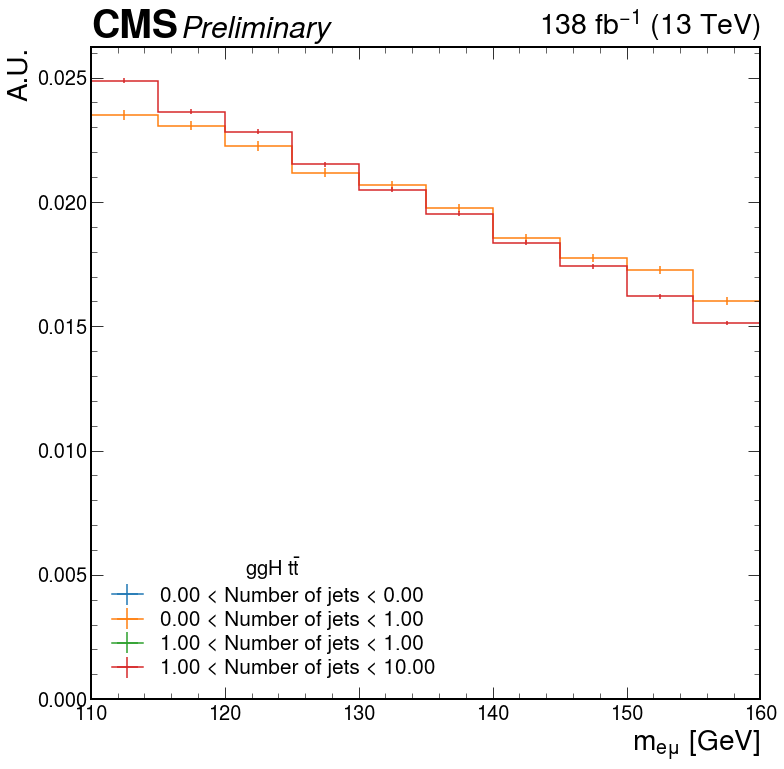

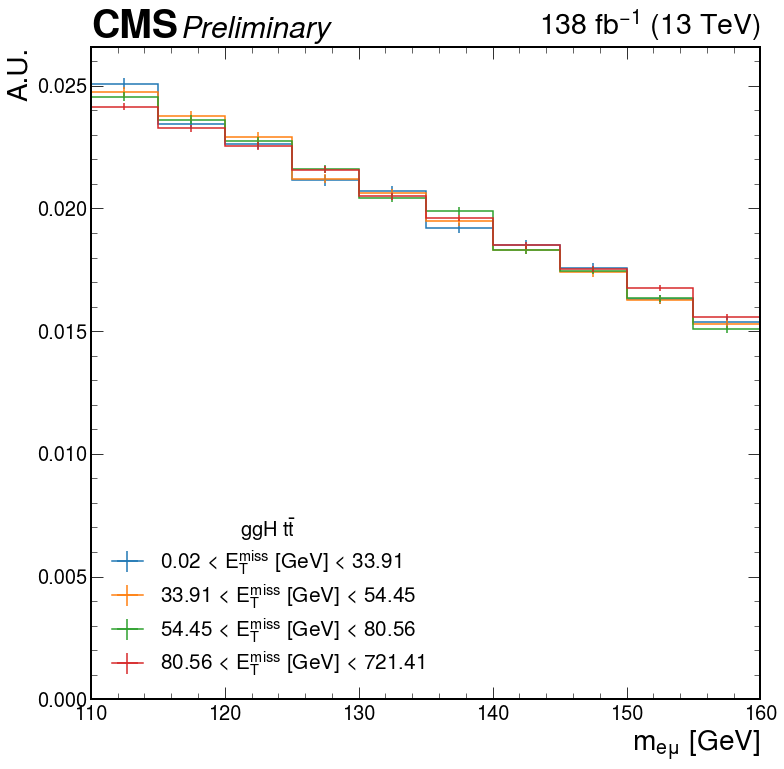

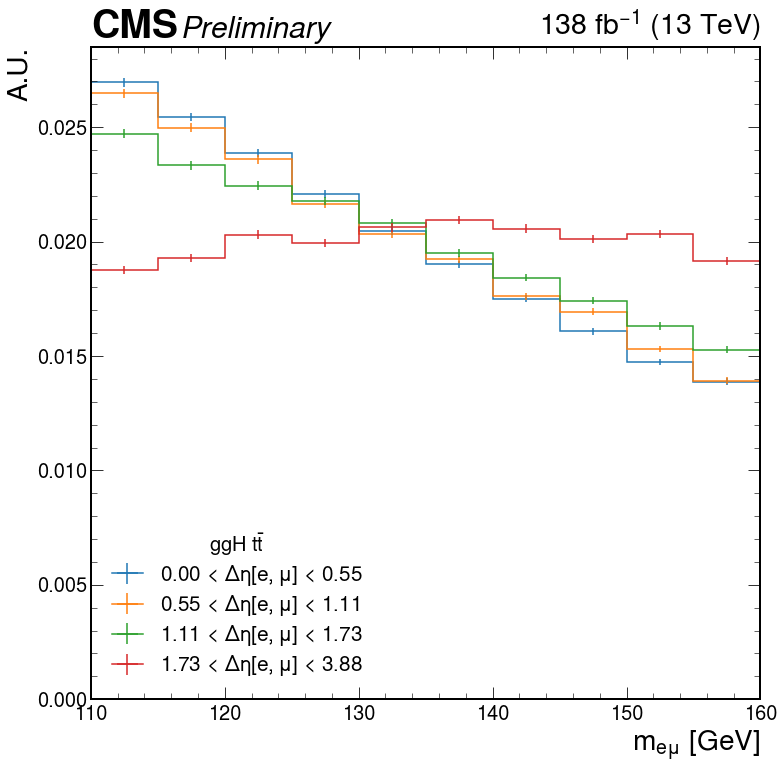

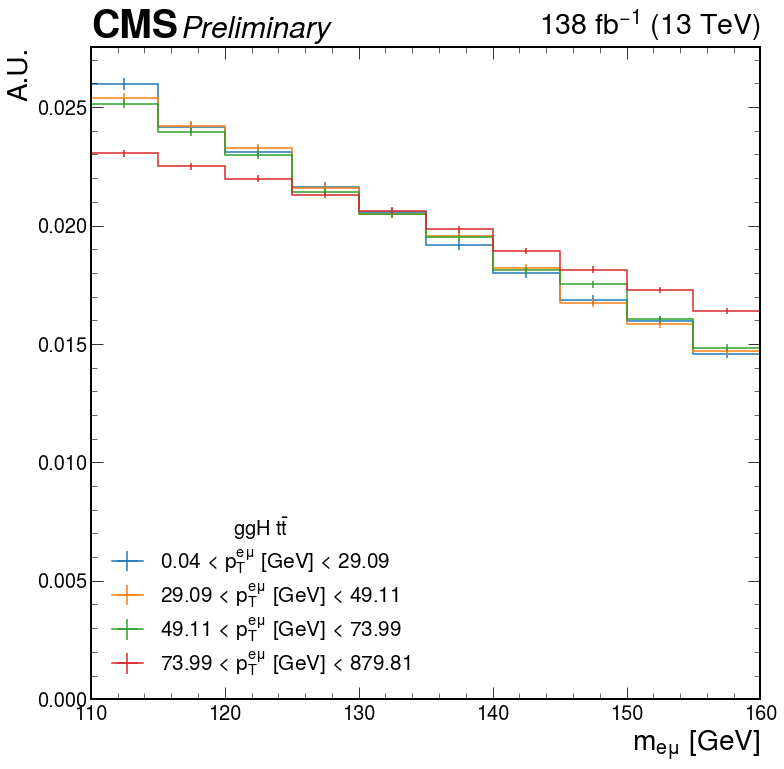

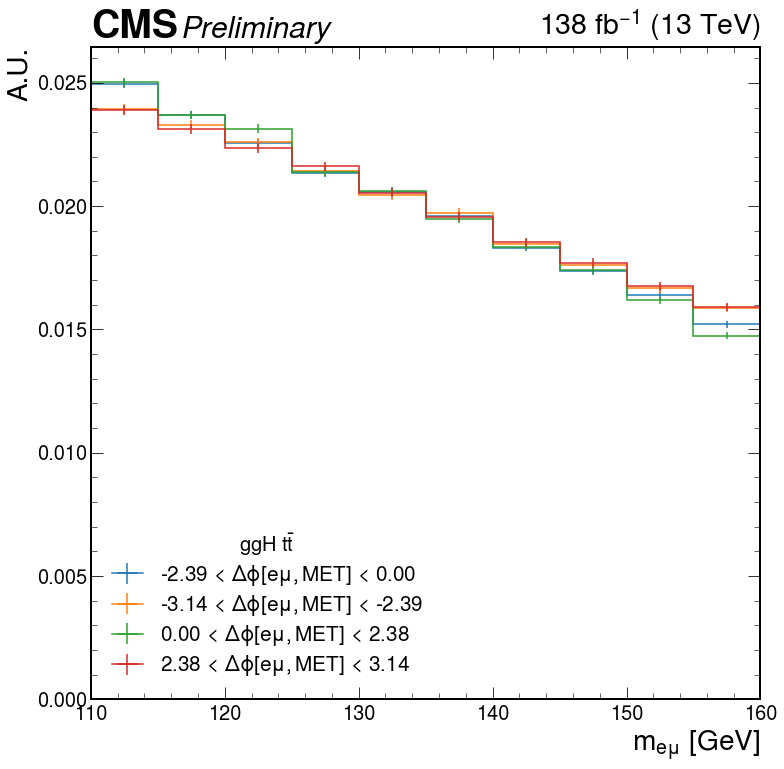

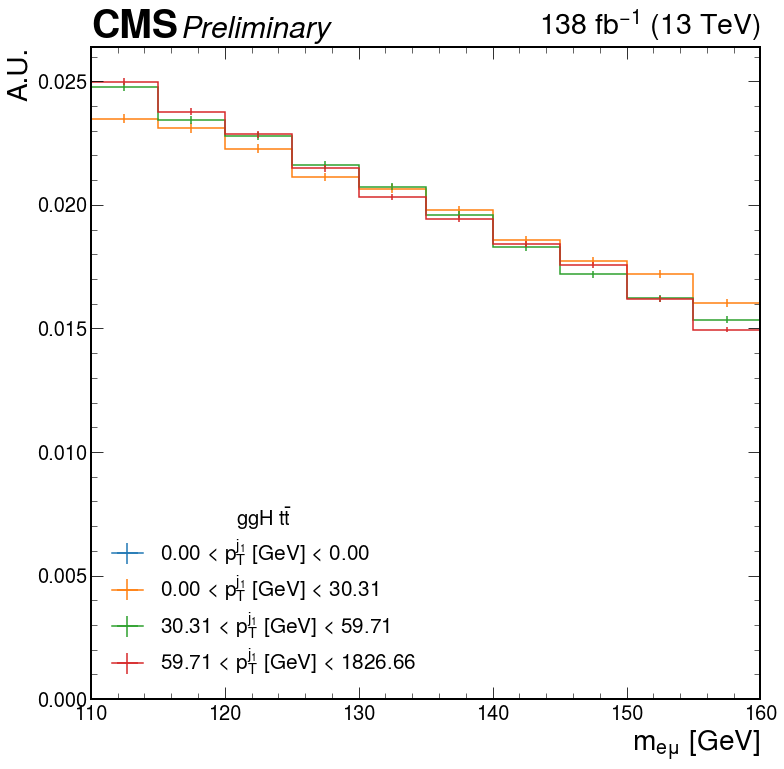

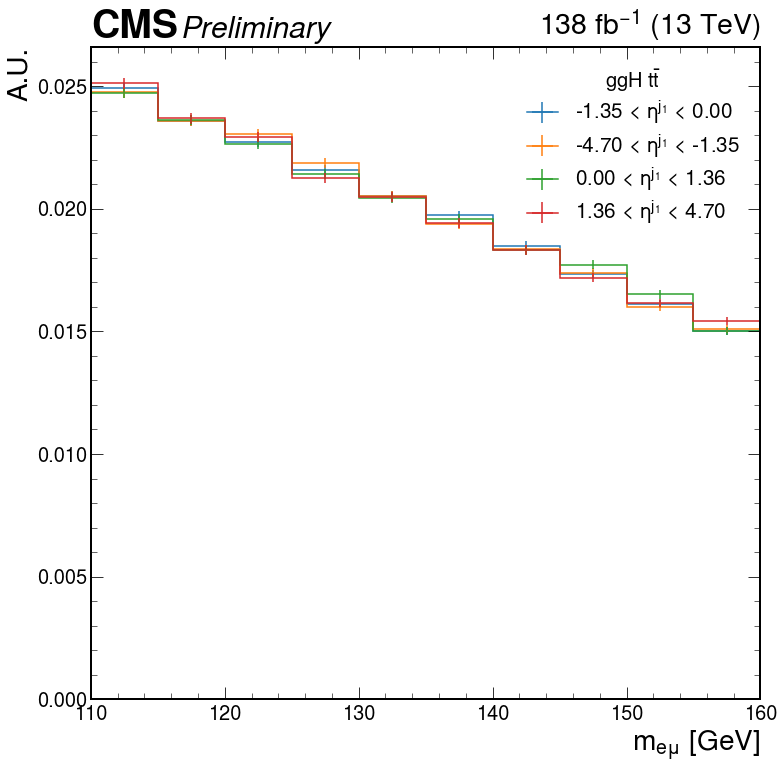

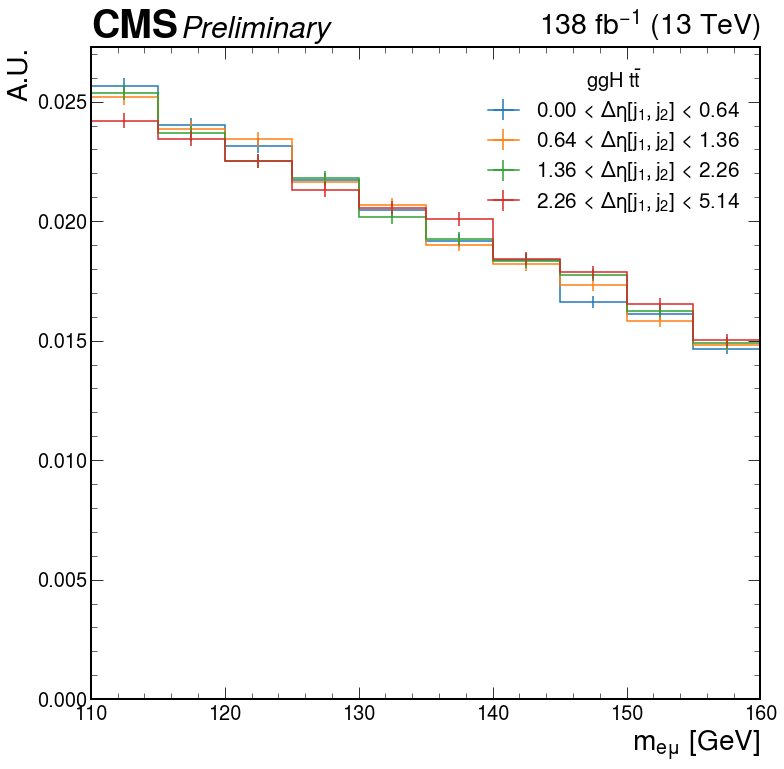

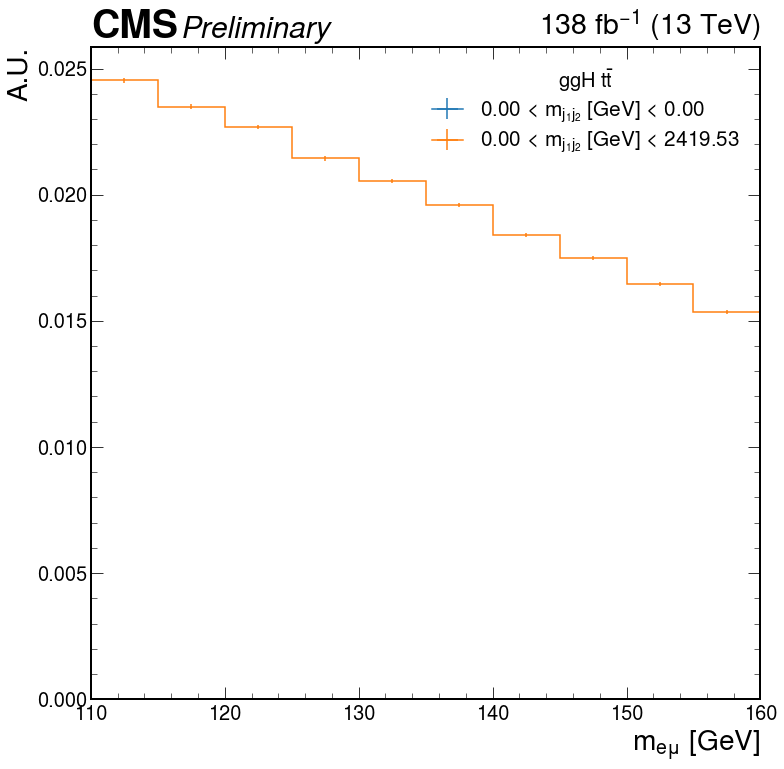

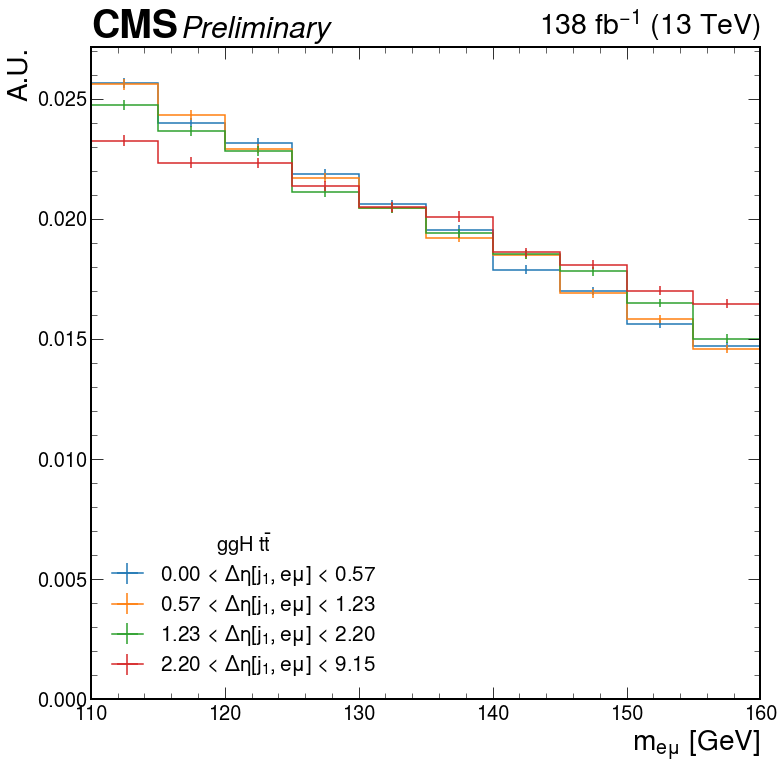

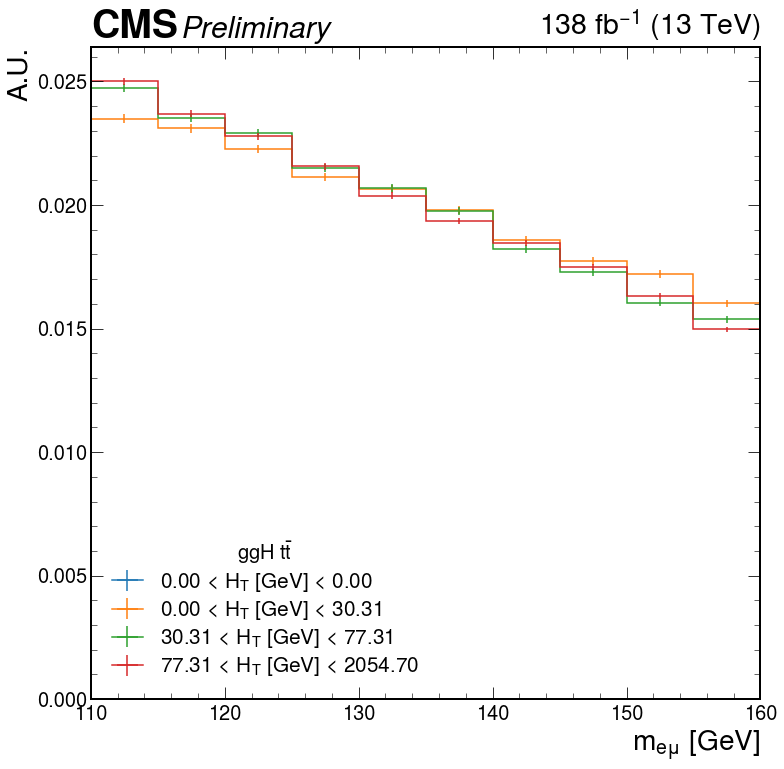

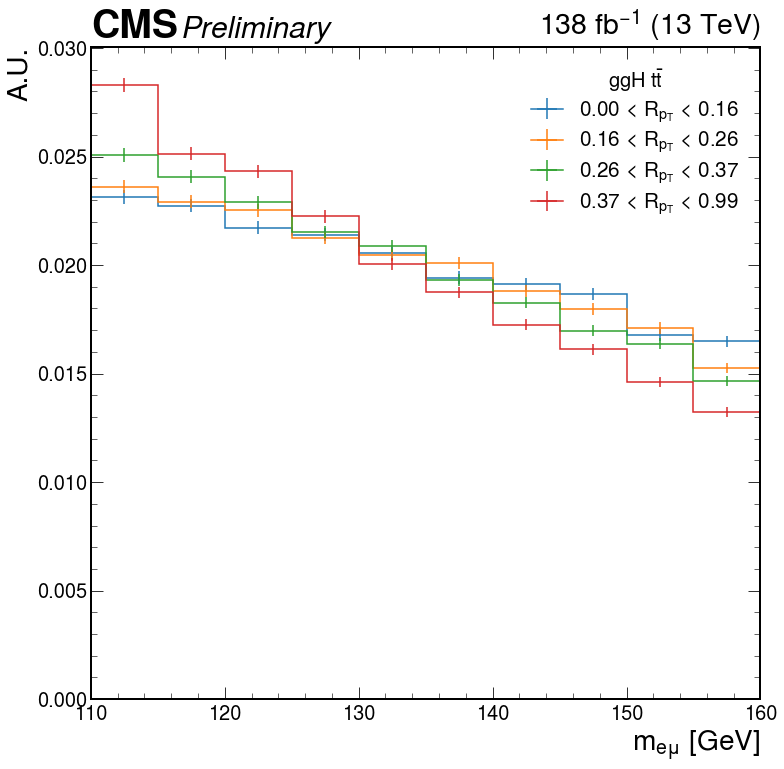

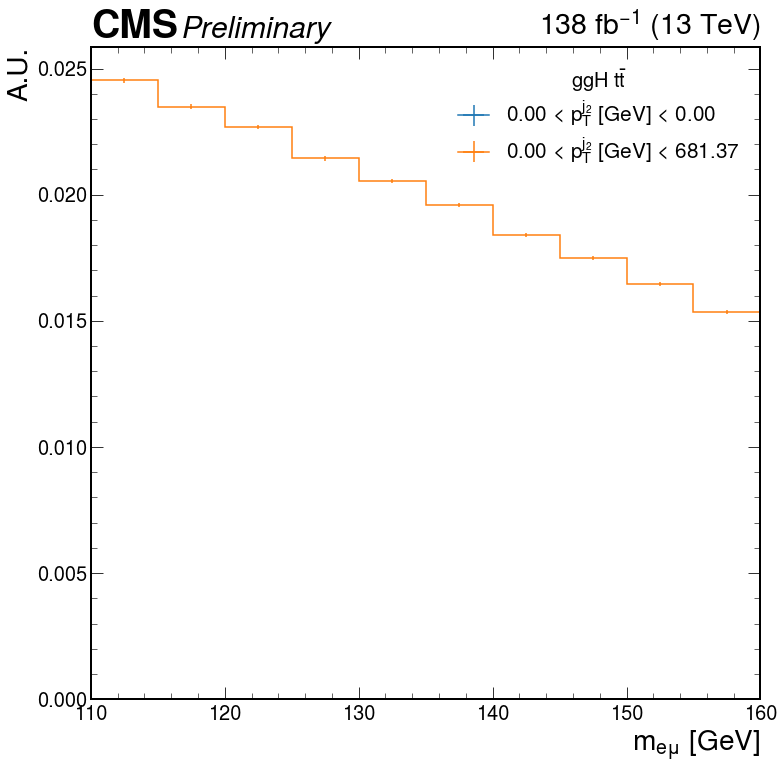

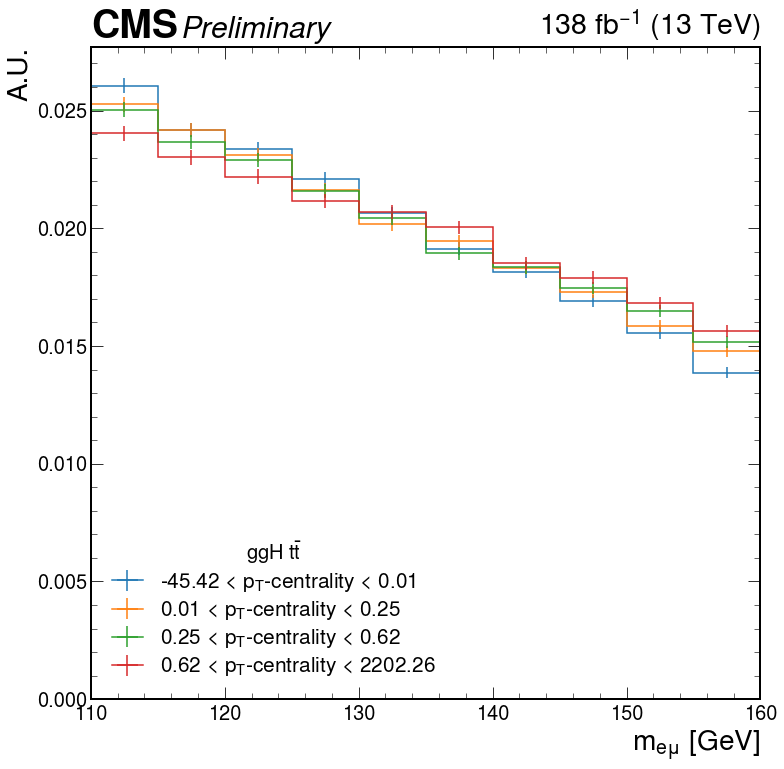

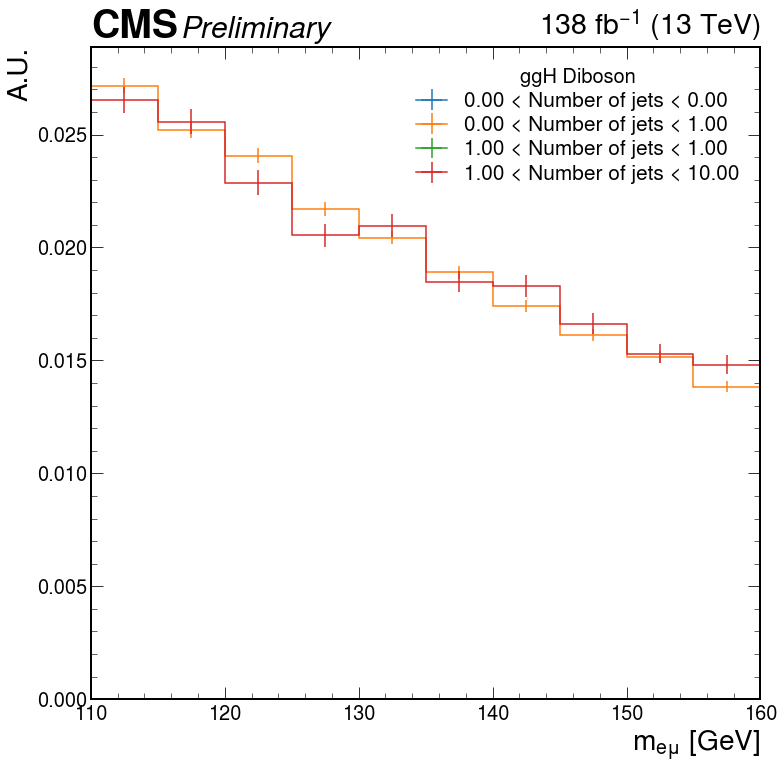

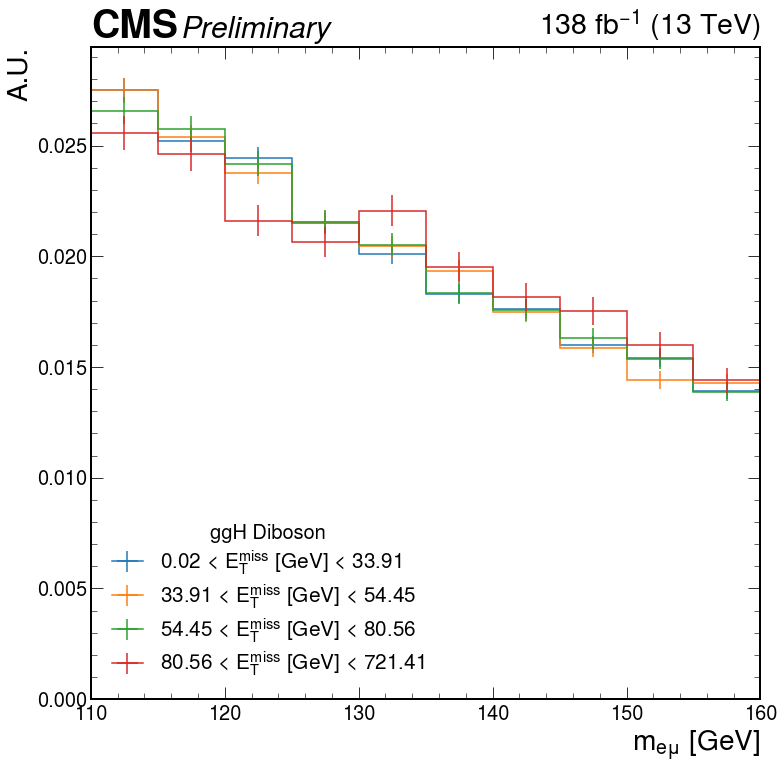

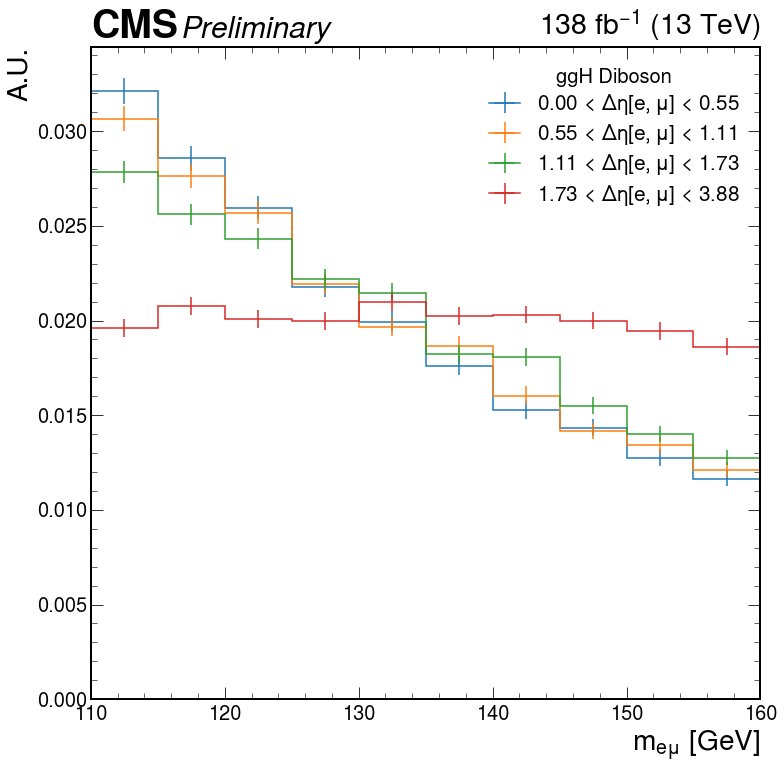

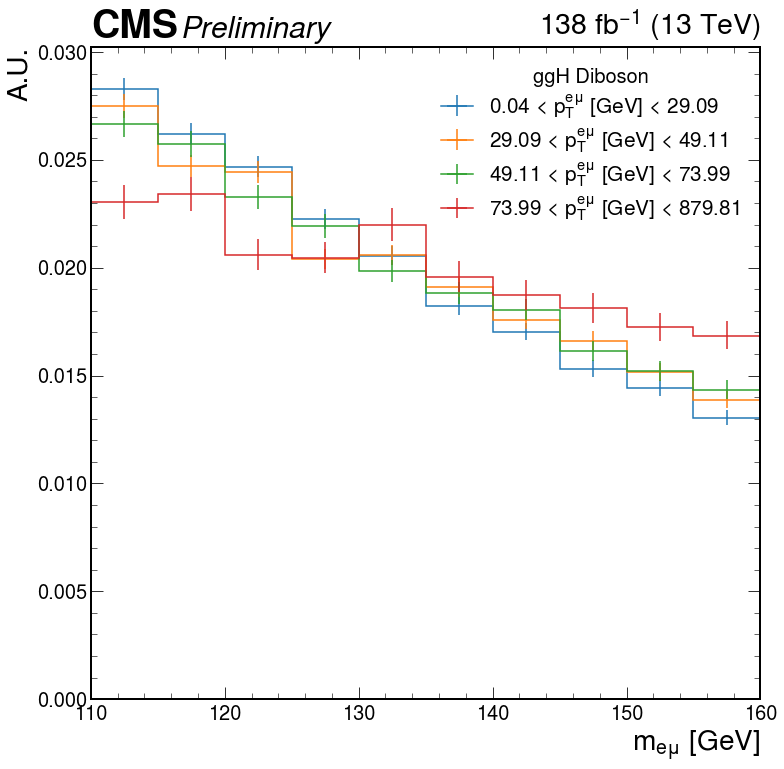

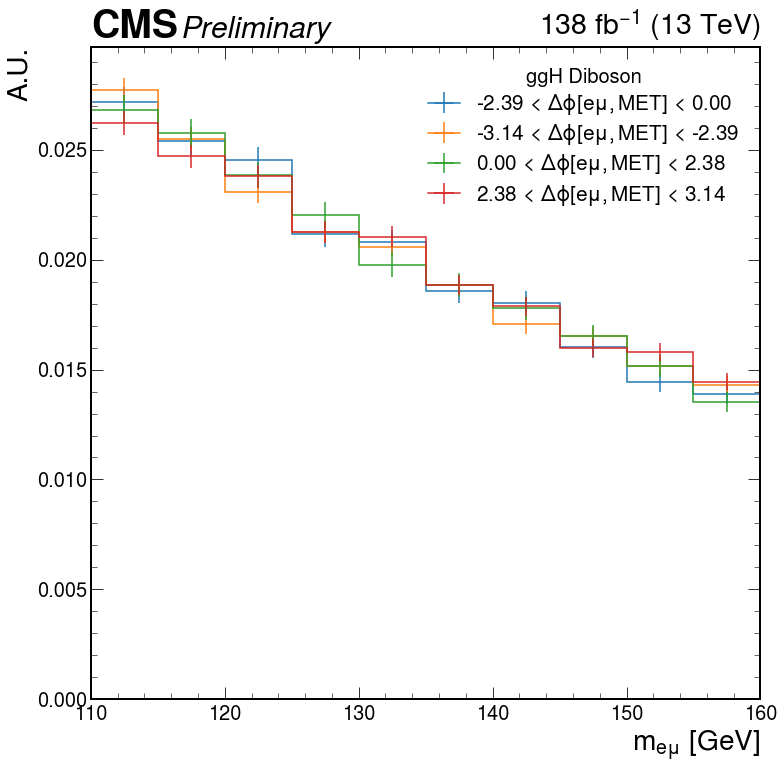

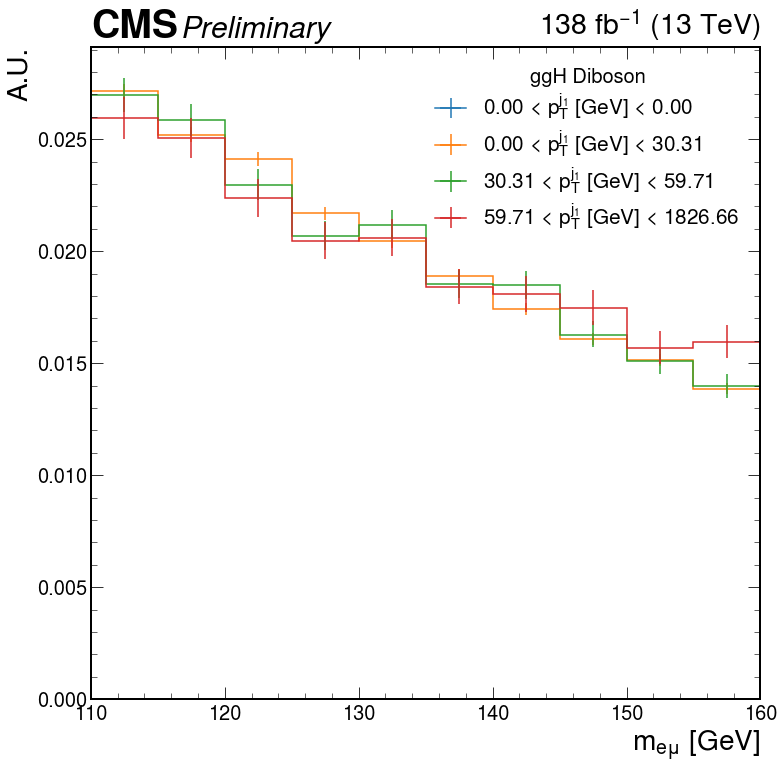

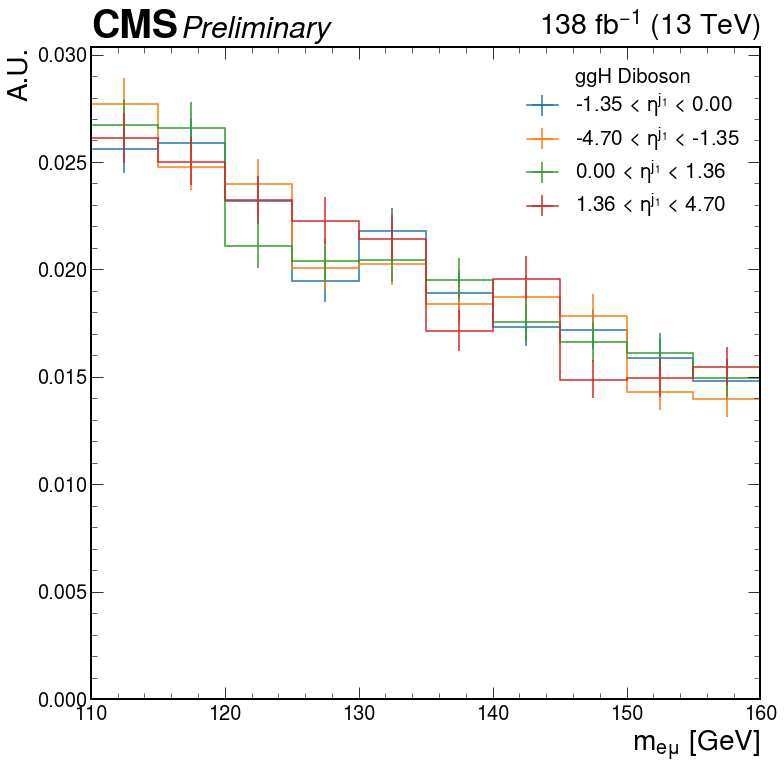

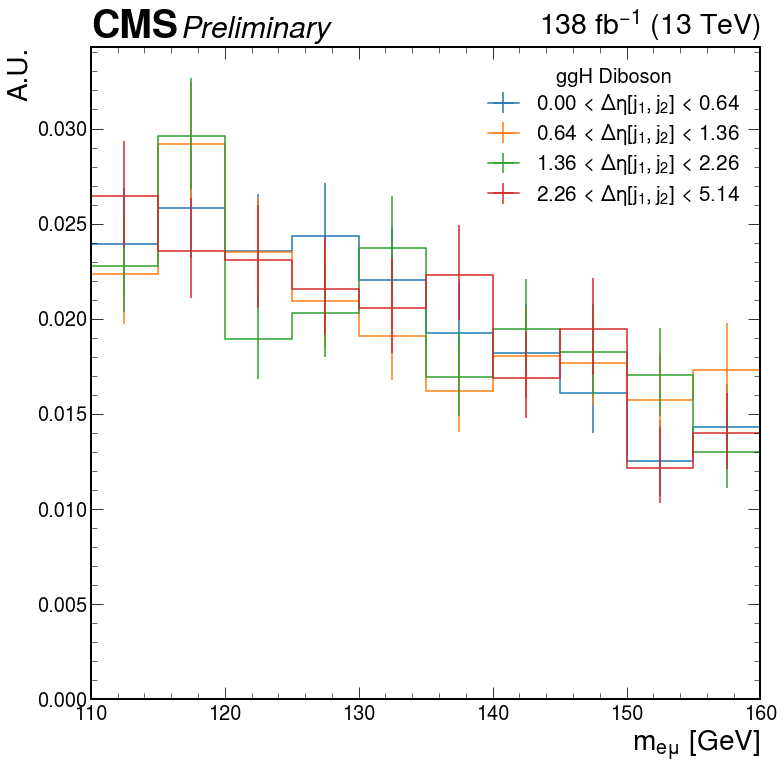

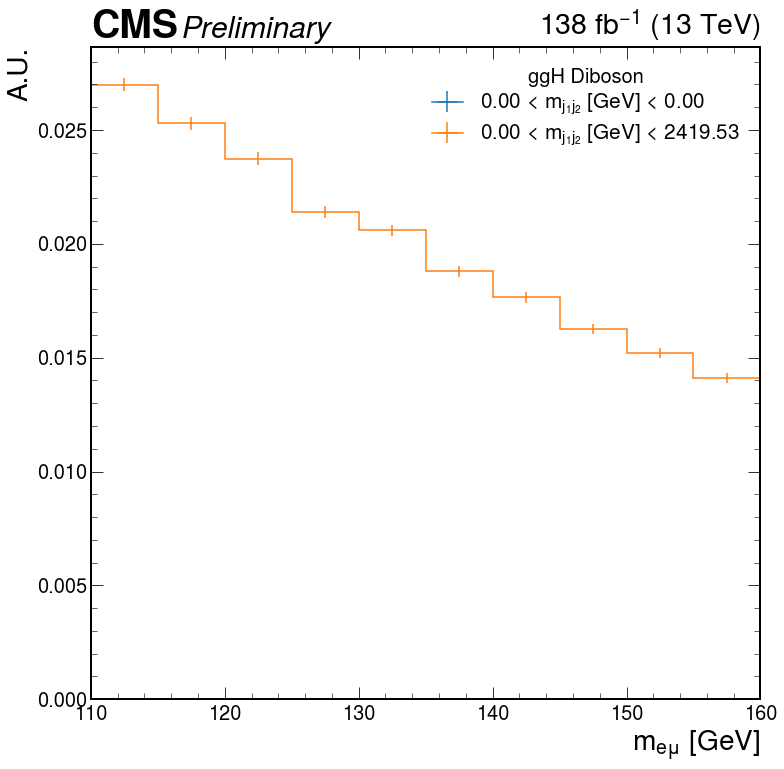

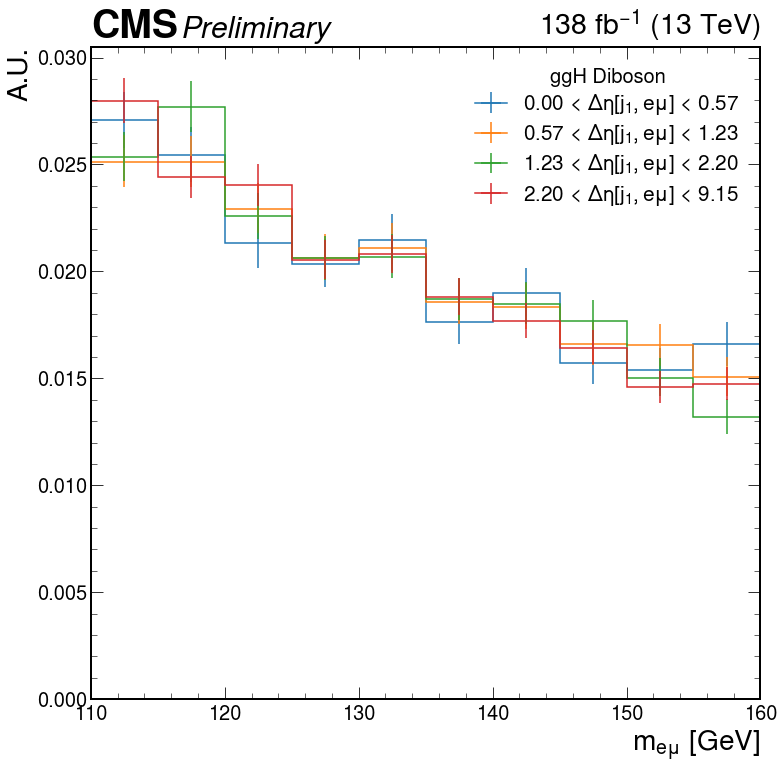

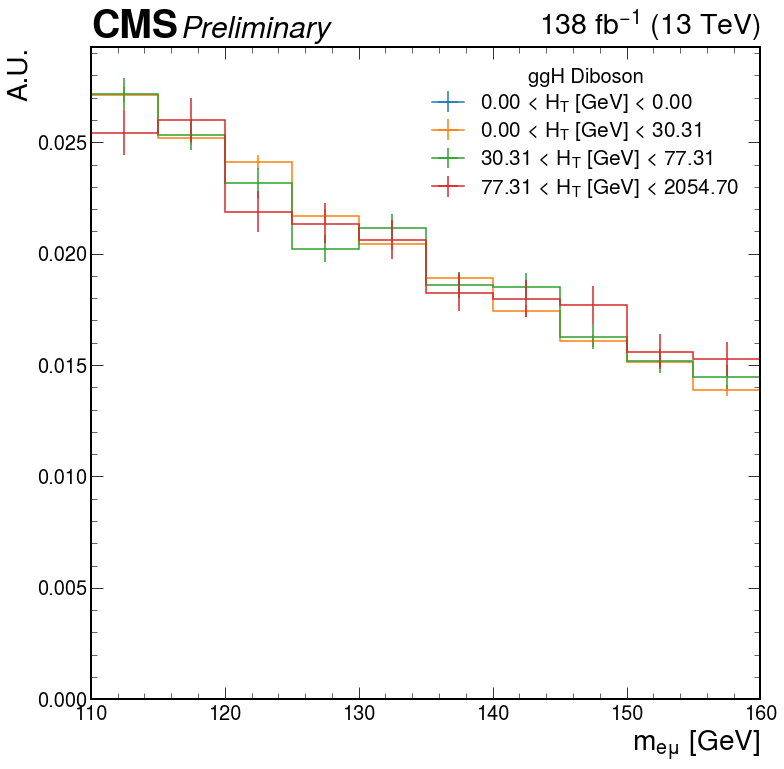

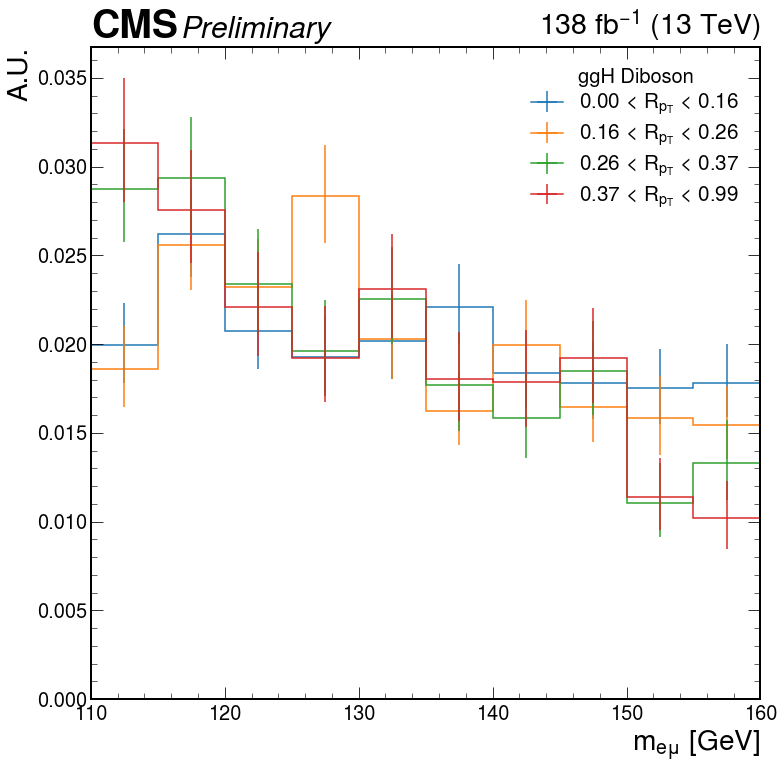

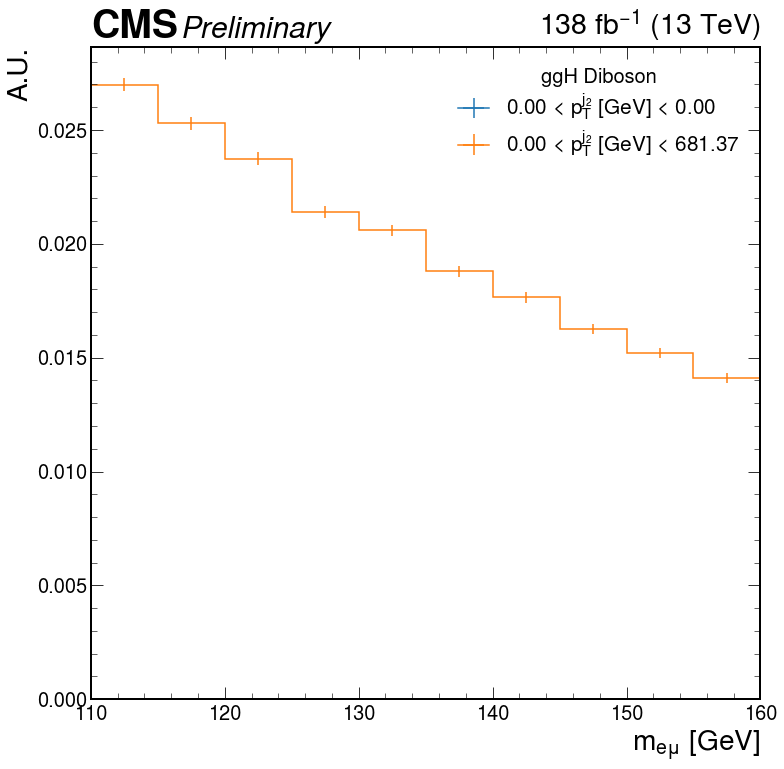

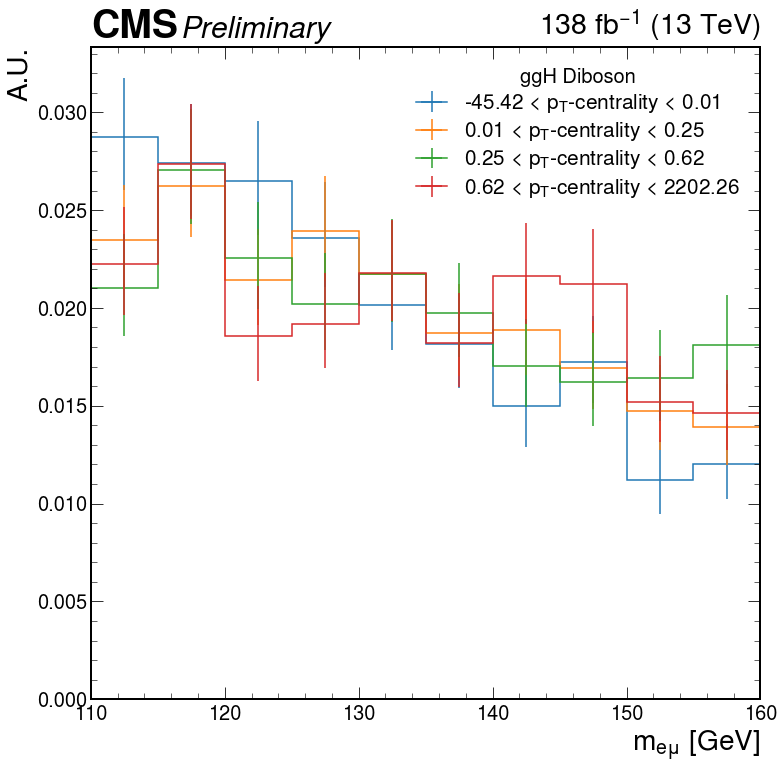

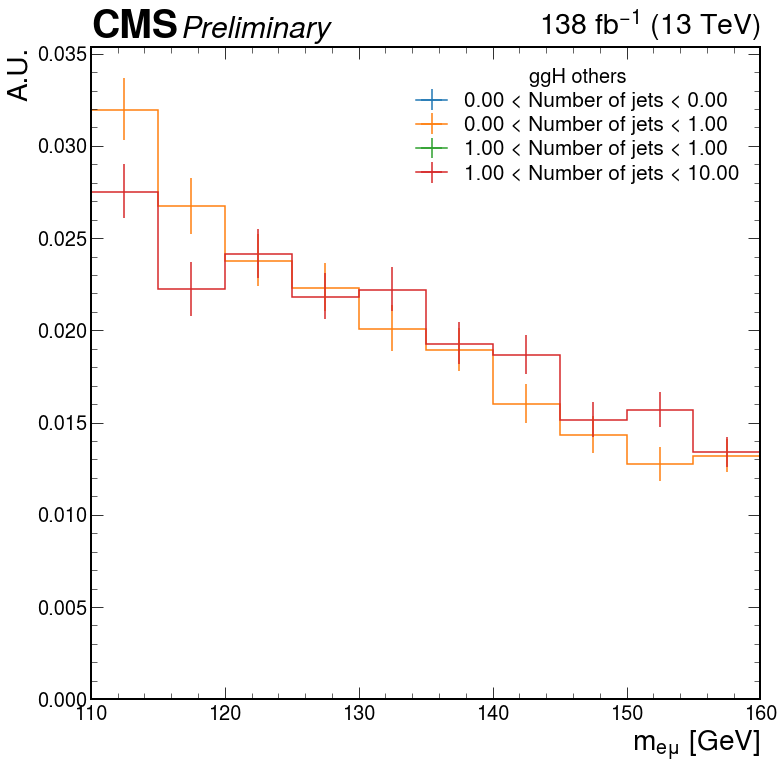

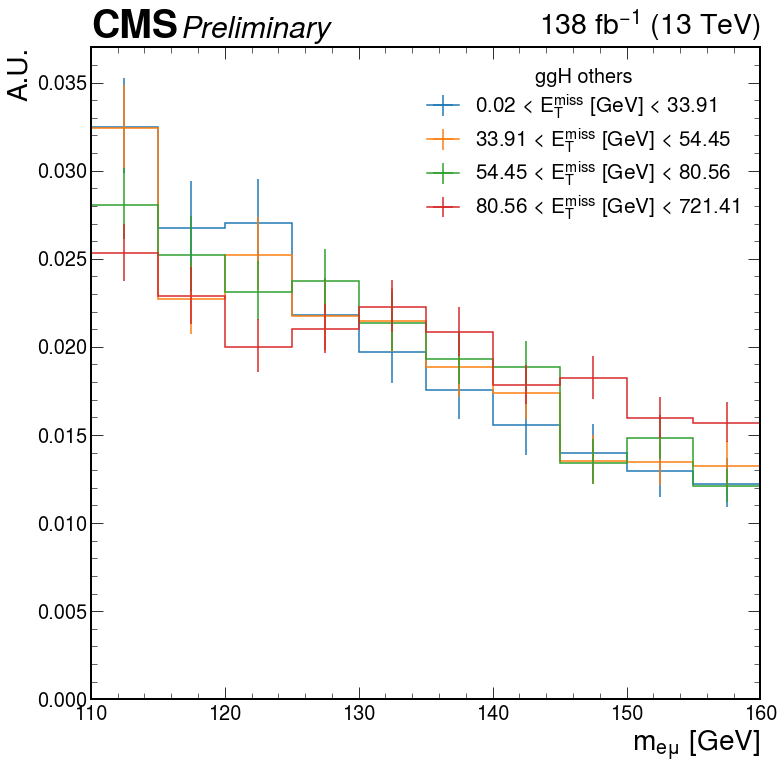

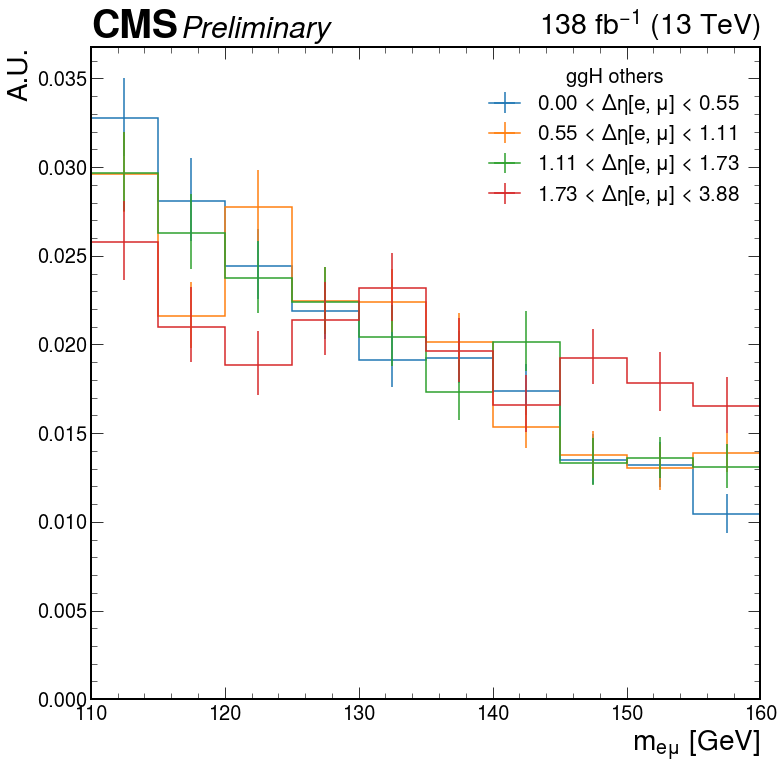

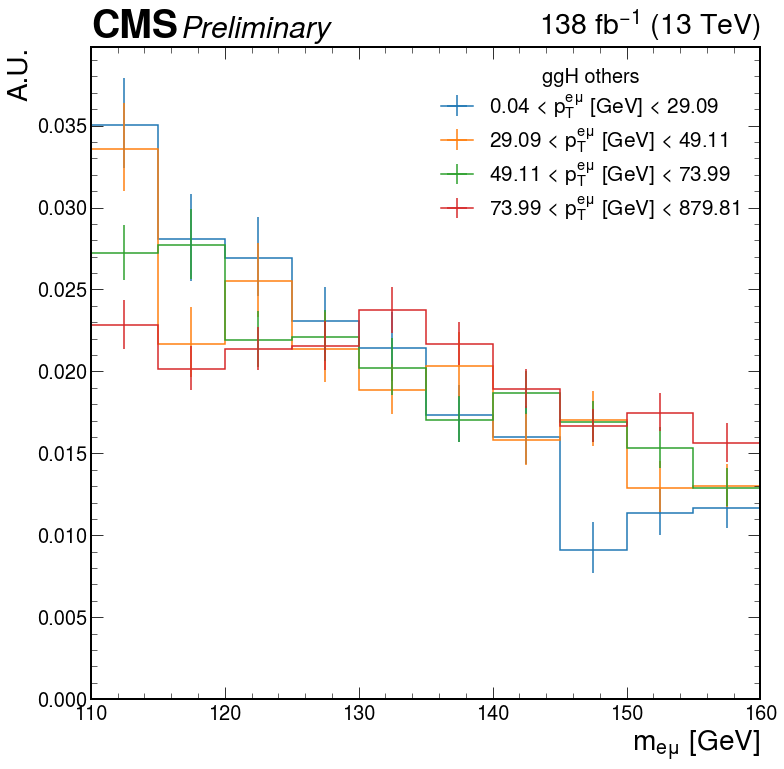

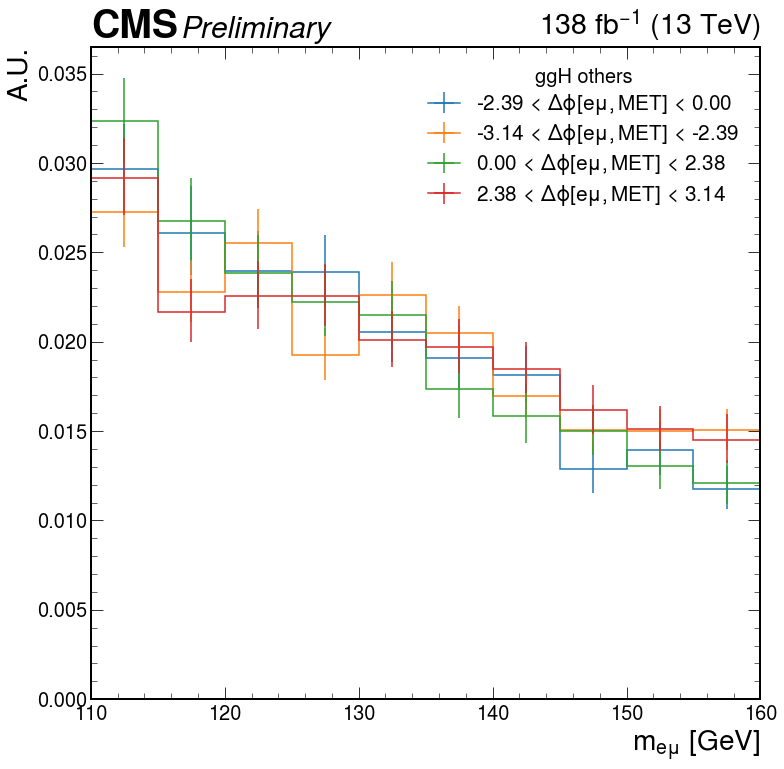

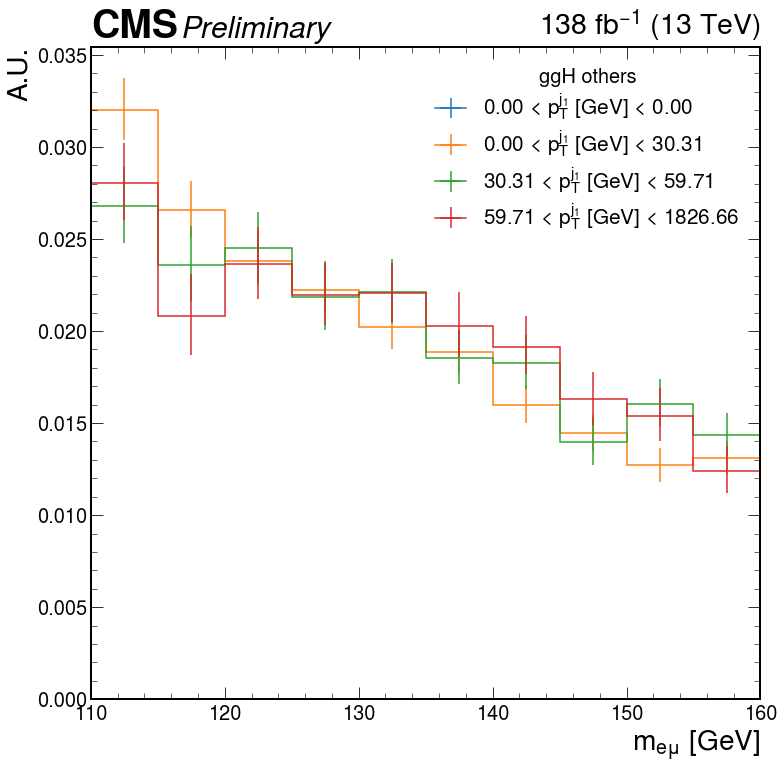

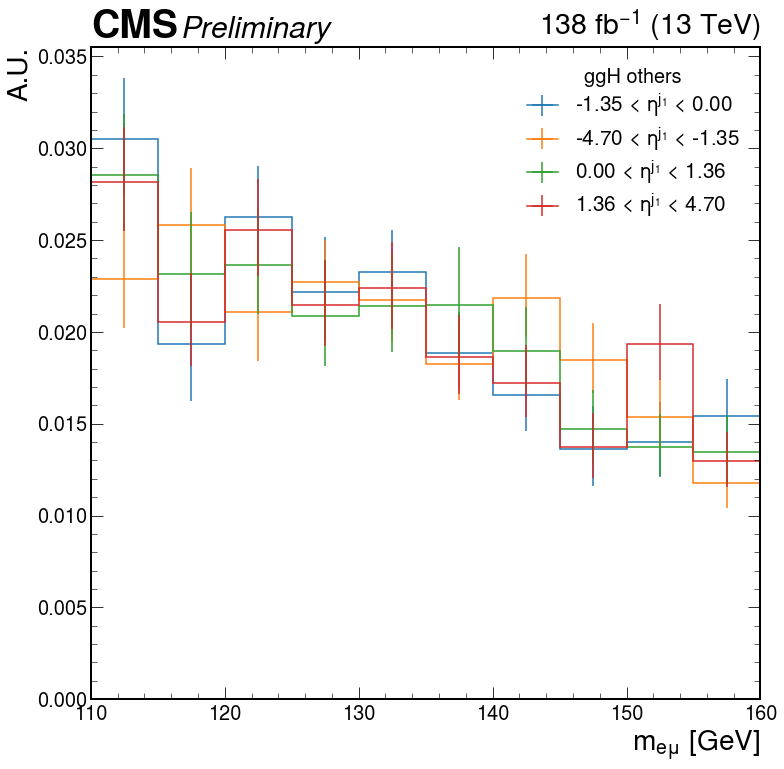

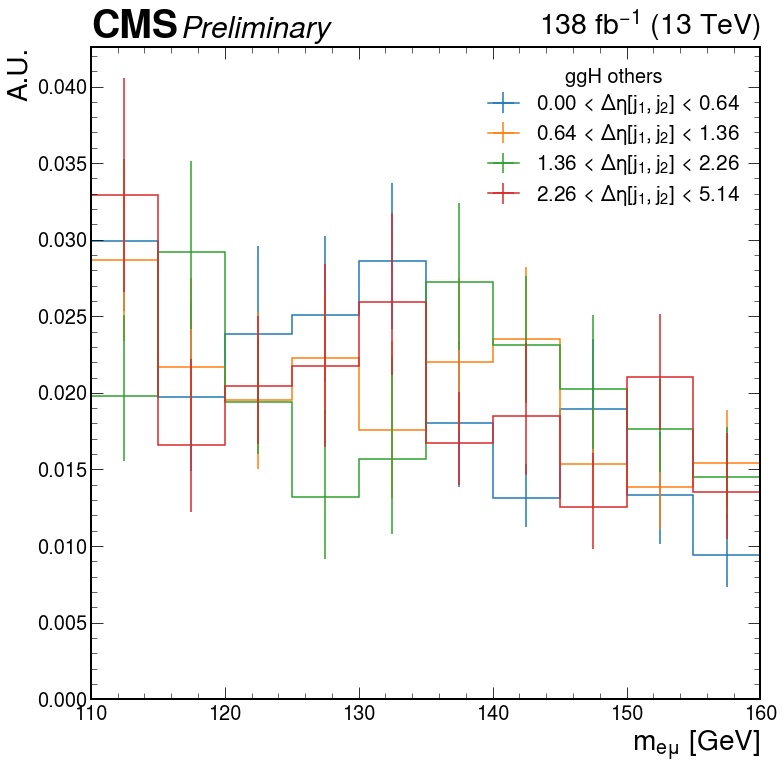

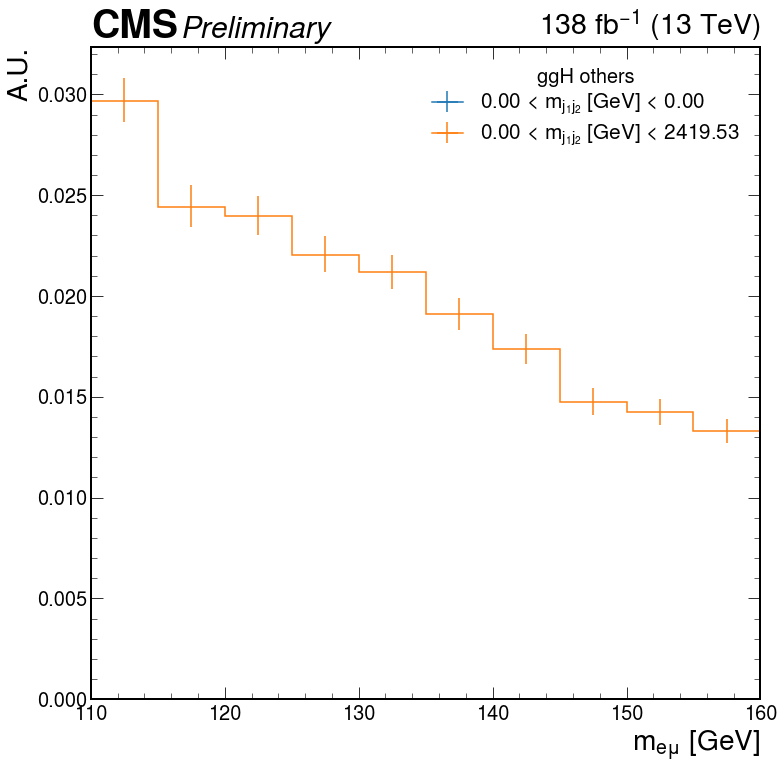

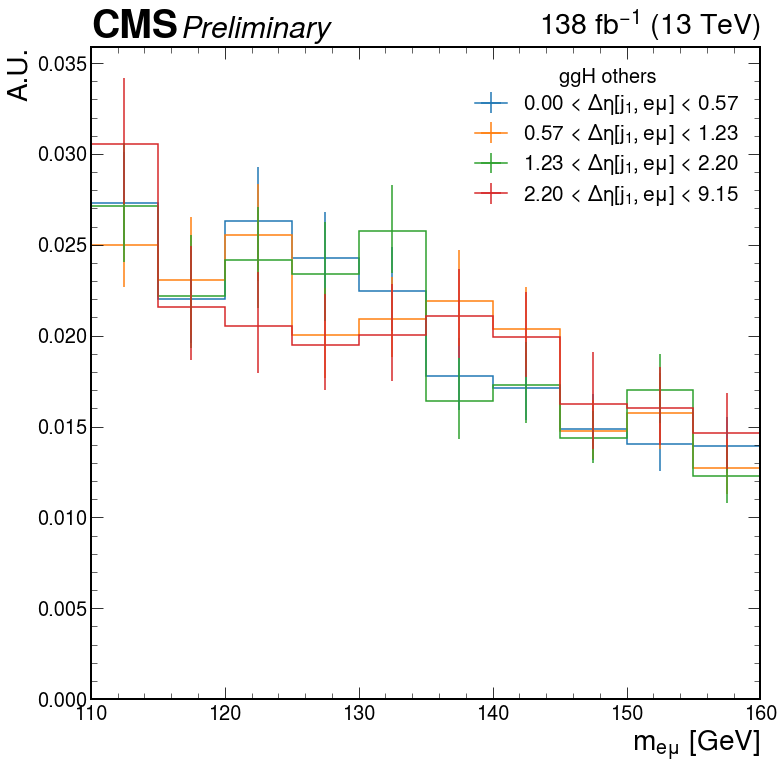

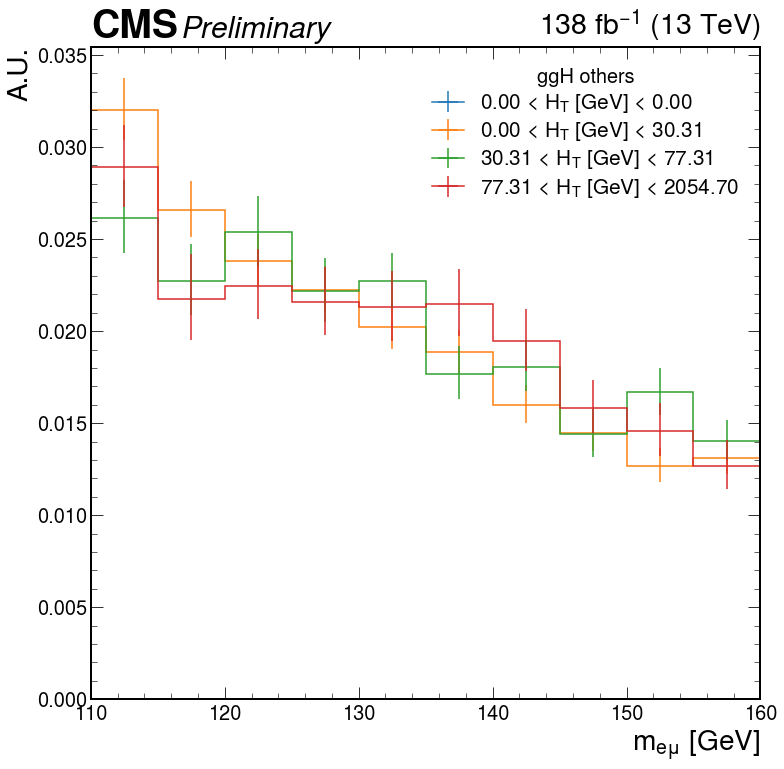

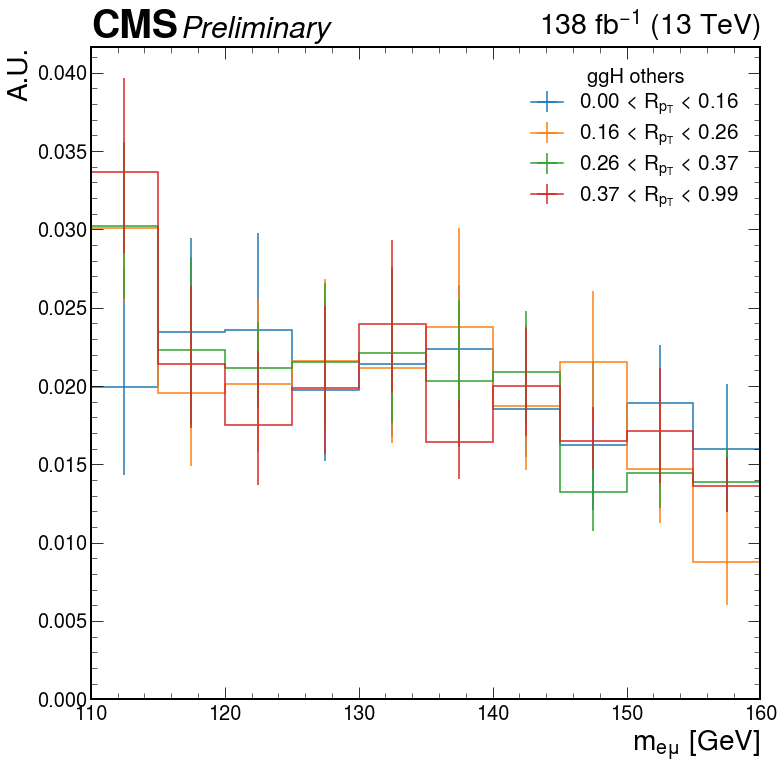

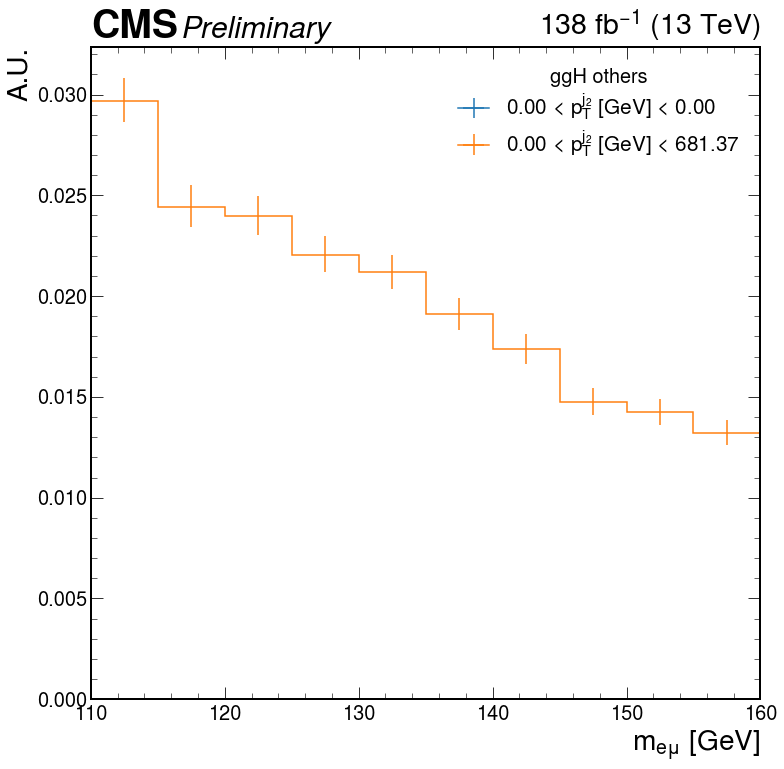

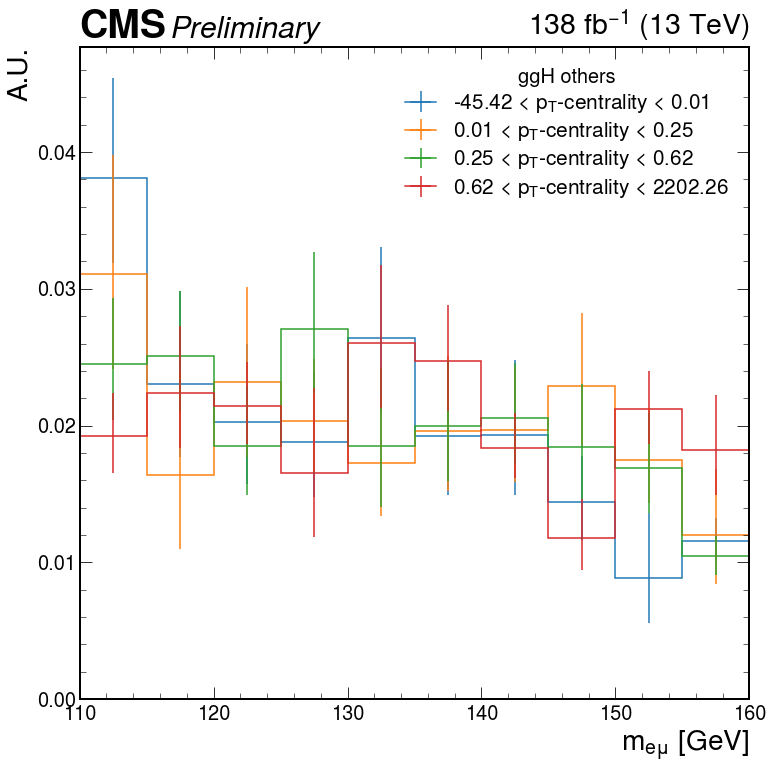

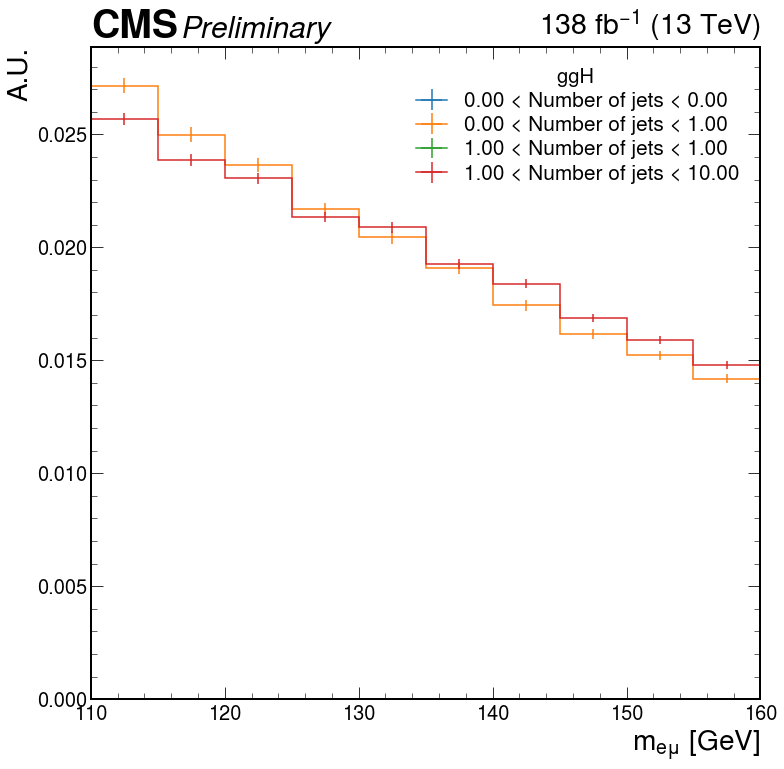

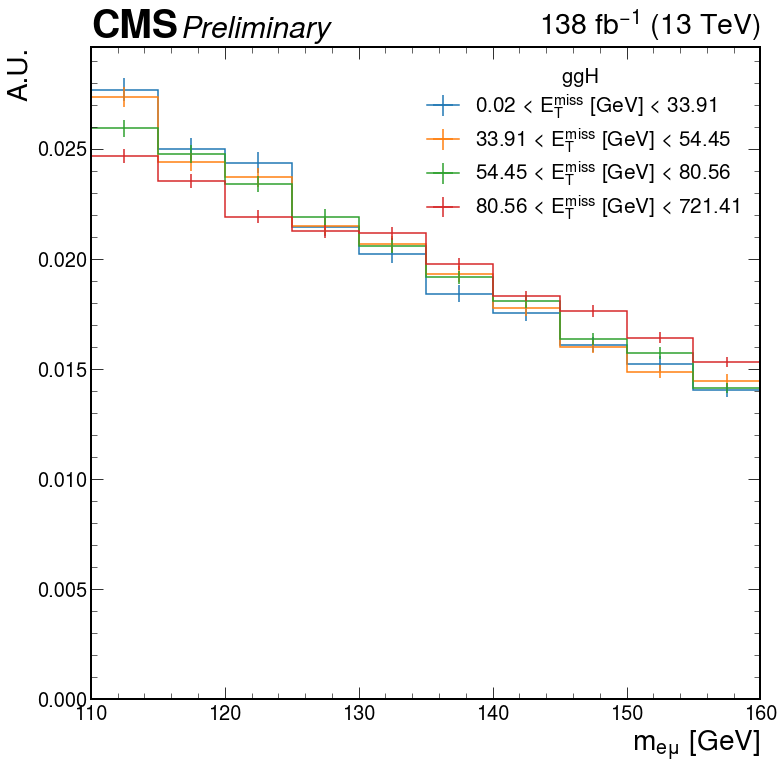

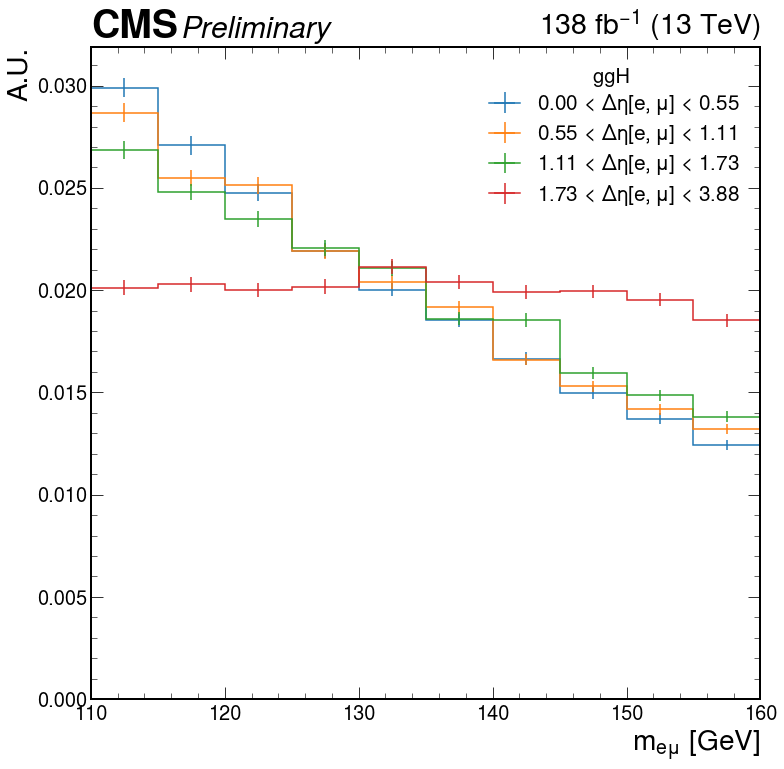

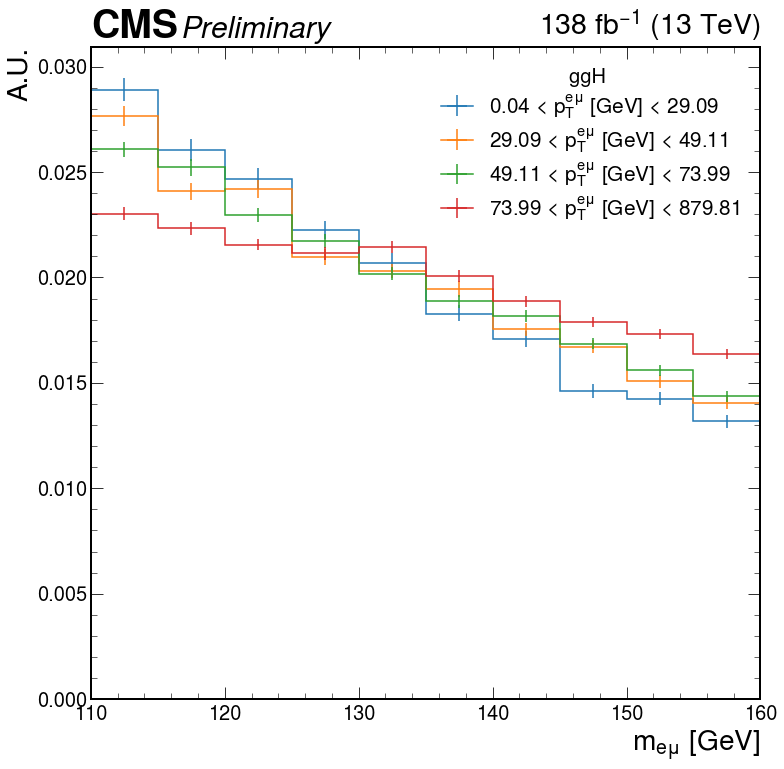

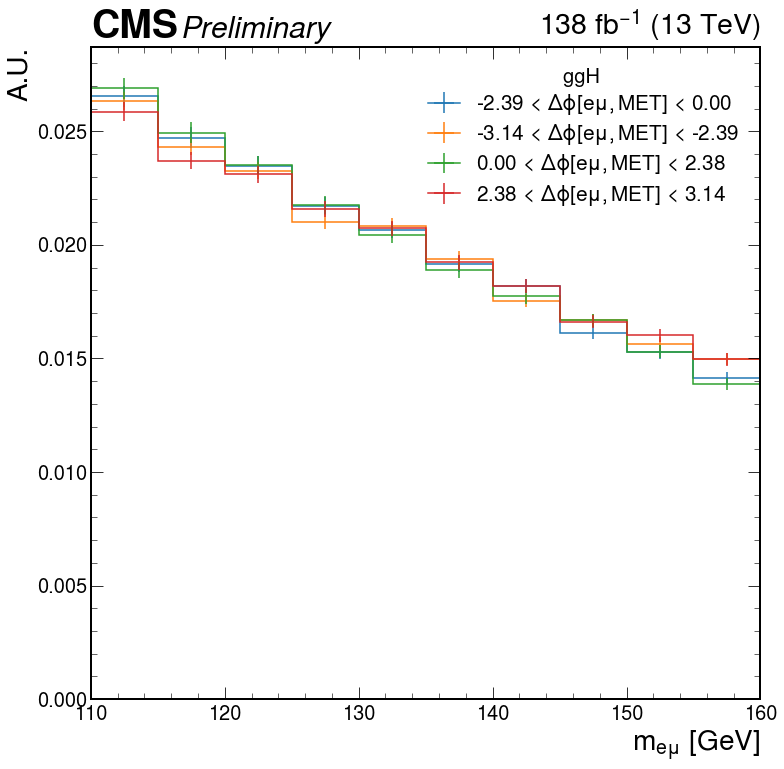

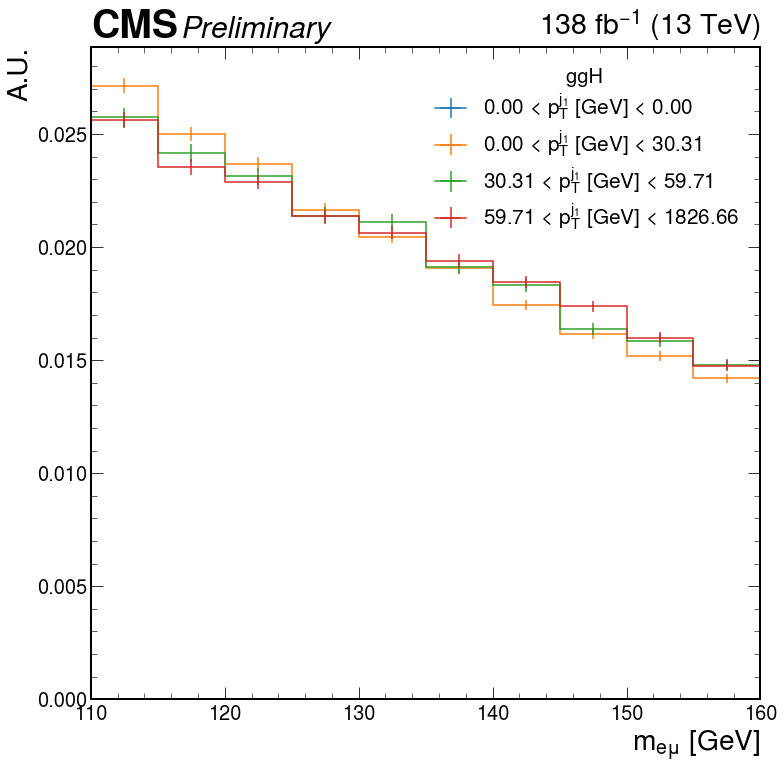

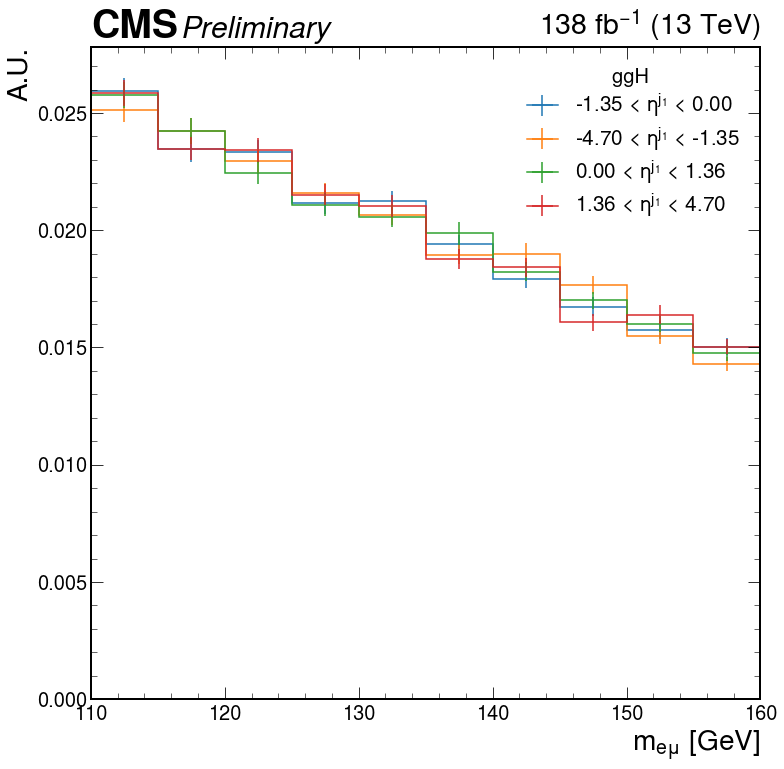

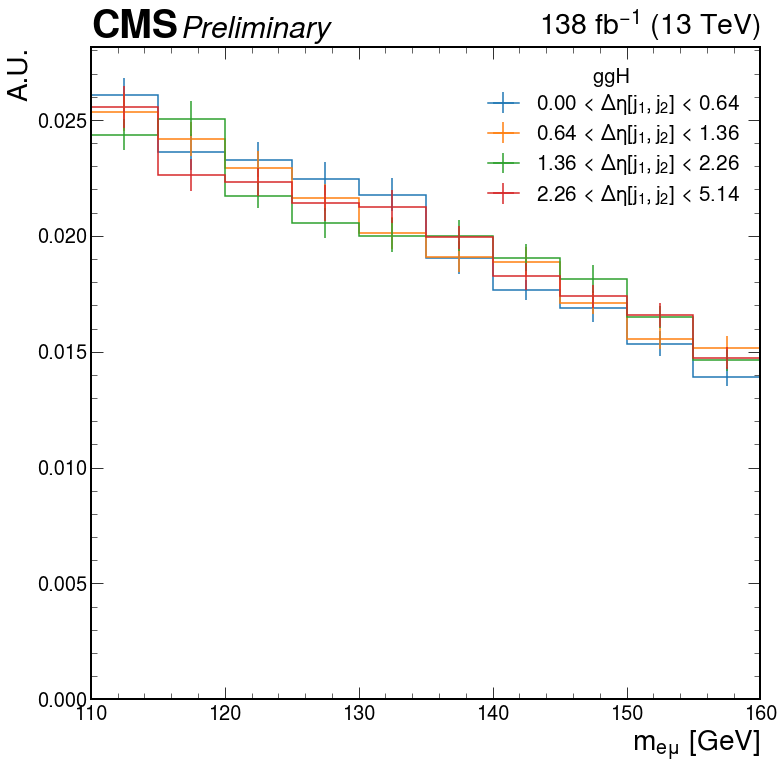

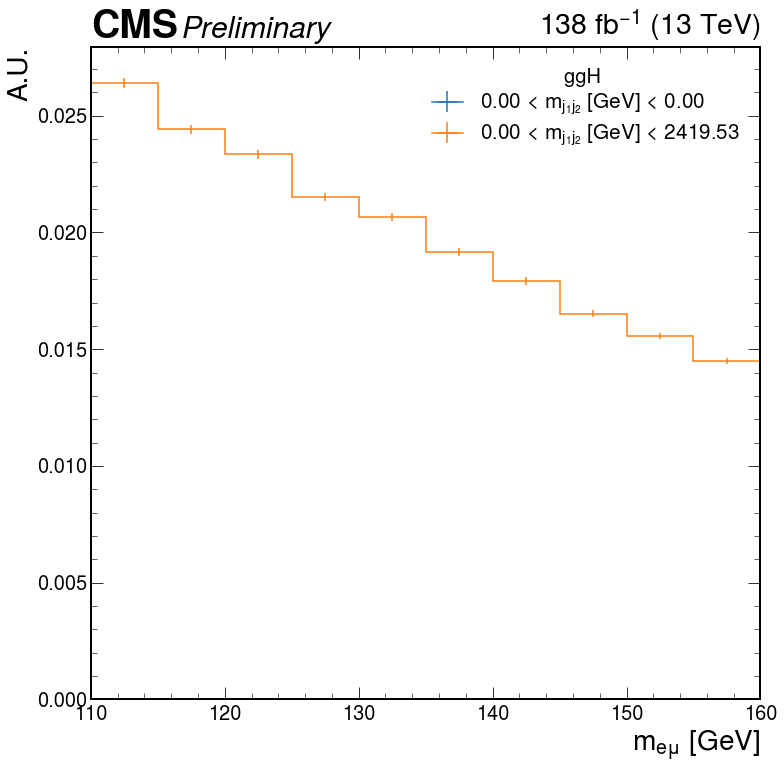

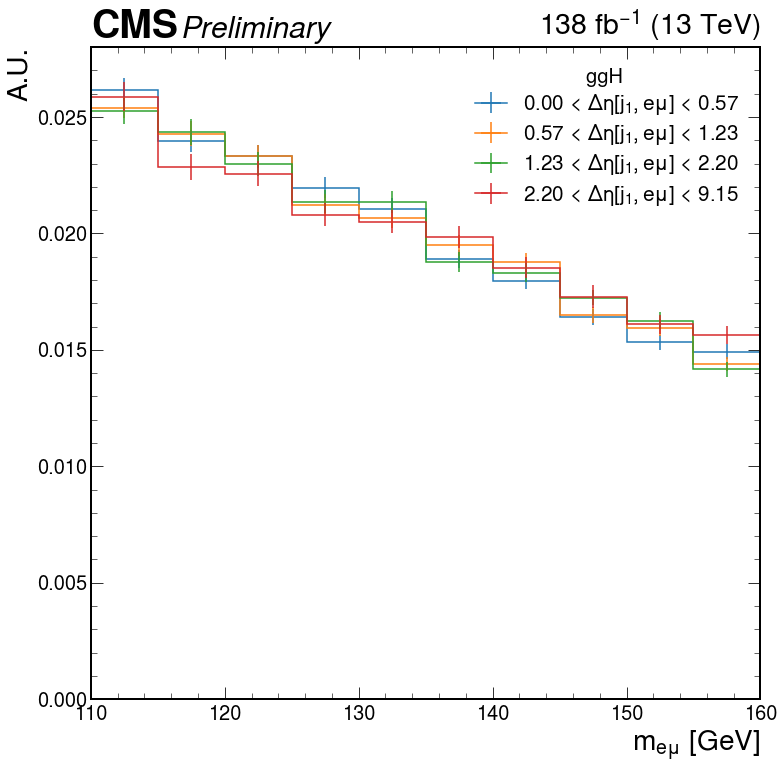

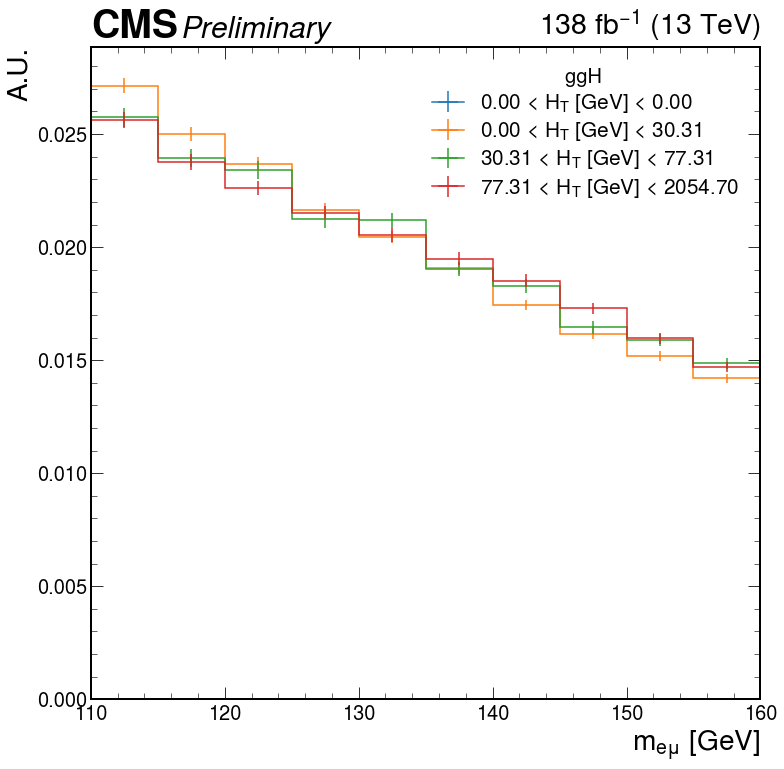

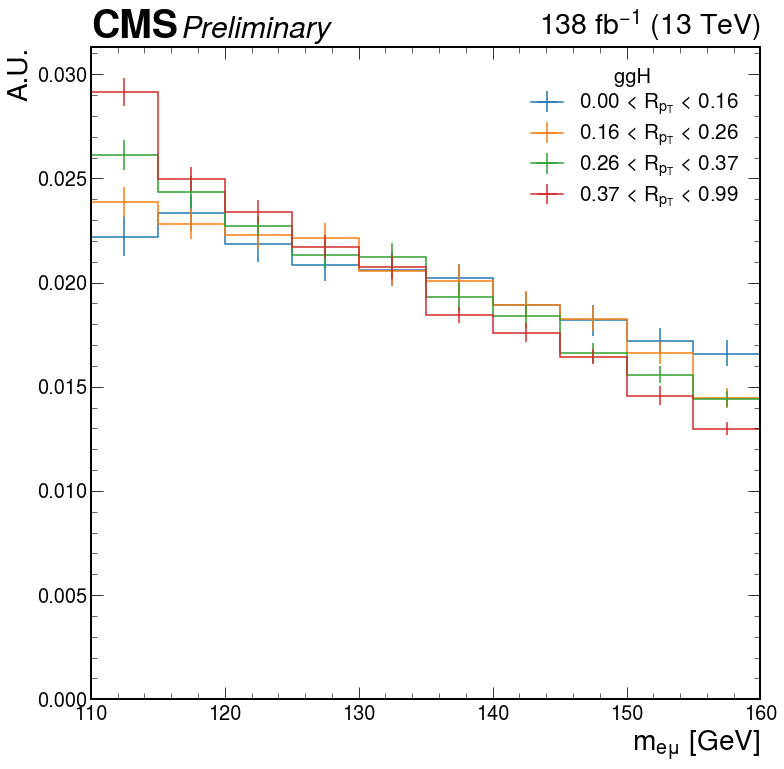

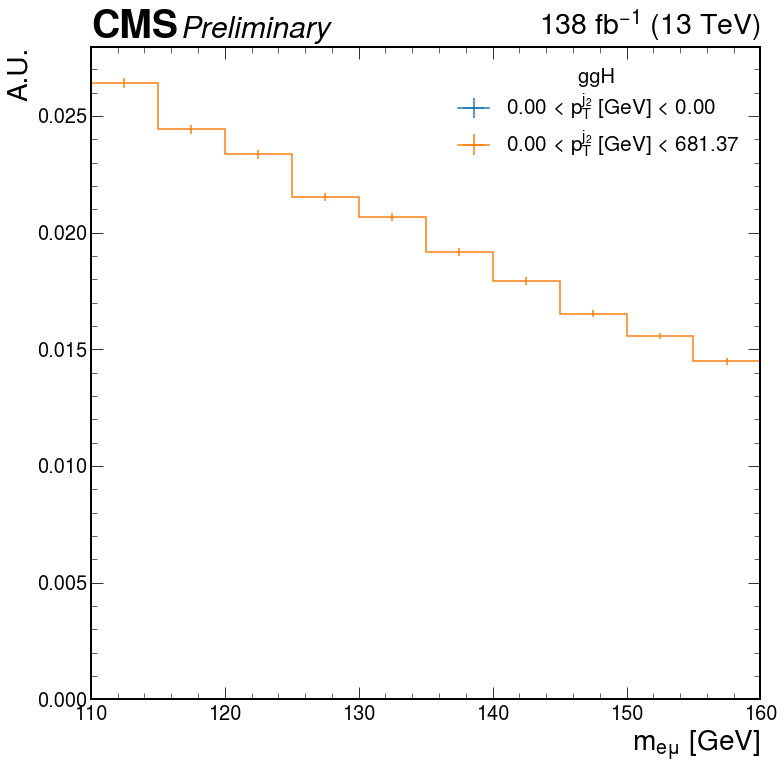

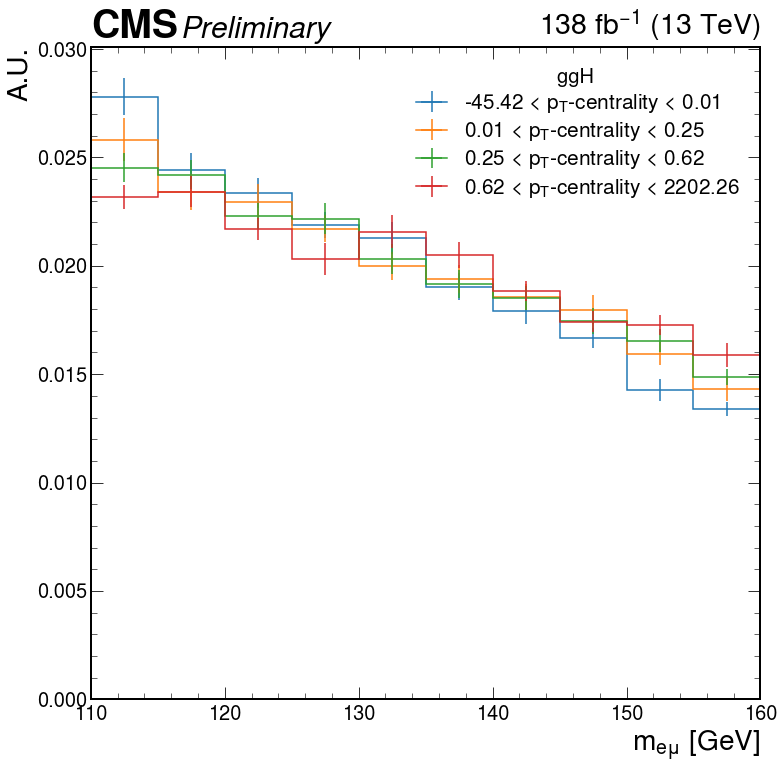

In [41]:
from coffea import hist
import mplhep
import matplotlib.pyplot as plt
catcatcat2='ggH'
feature_names_2jets_GG = ['njets', 'met', 'DeltaEta_e_m', 'empt', 'DeltaPhi_em_met', 'j1pt', 'j1Eta', 'DeltaEta_j1_j2', 'j1_j2_mass', 'DeltaEta_j1_em', 'Ht_had', 'Rpt', 'j2pt', 'pt_cen_Deltapt']
keep = feature_names+['weight', 'sample', 'e_m_Mass']
#Get the background
data_all = df[(df['label']==0)&(df['isVBFcat']==0)&(df['mtrigger']==1)]
quantiles = wq.quantile(probs=np.array([0, 0.25, 0.50, 0.75, 1]), return_pandas=False)
for subsample, ind in subsamples.items():
    for feature in feature_names_2jets_GG:
        data_bkg = data_all[data_all['sample'].isin(ind)]
        #Get 20% quantiles of the background
        from statsmodels.stats.weightstats import DescrStatsW
        #quantiles = wq.quantile(probs=np.array([0, 0.20, 0.40, 0.60, 0.80, 1]), return_pandas=False)
        #quantiles = wq.quantile(probs=np.array([0, 0.25, 1]), return_pandas=False)
        #Fill in sliced invariant mass according to MVA quantiles
        h_quan = hist.Hist('A.U.', hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 10, 110, 160), hist.Cat("sample", "sample"))
        #scales = {}
        wq = DescrStatsW(data=data_all[feature], weights=data_all['weight'])
        quantiles = wq.quantile(probs=np.array([0, 0.25, 0.50, 0.75, 1]), return_pandas=False)
        print(quantiles)
        print(data_bkg['weight'].sum())
        for i in range(len(quantiles)-1):
            quant25 = data_bkg[(data_bkg[feature]<quantiles[i+1])&(data_bkg[feature]>=quantiles[i])]
            print(quant25['weight'].sum())
            label = f'{quantiles[i]:.2f} < {features_map[feature][0]} < {quantiles[i+1]:.2f}'
            h_quan.fill(e_m_Mass=quant25['e_m_Mass'].to_numpy(), sample=label, weight=quant25['weight'].to_numpy())
            #scales[label] = 1/np.sum(quant25['weight'].to_numpy())

        #h_quan.scale(scales, axis='sample')

        plt.style.use(mplhep.style.CMS)
        plt.rcParams.update({
            'font.size': 30,
            'axes.titlesize': 24,
            'axes.labelsize': 28,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'legend.title_fontsize': 20
        })

        fig = plt.figure(
                figsize=(12,12),
              )

        ax = hist.plot1d(h_quan, density=True)
        #ax.set_ylim(0, 0.05)
        leg = ax.legend(fontsize='x-small', labelspacing=0.25, title=catcatcat2+' '+subsample)

        lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[0.         0.03700138 0.18138373 0.47081074 1.001     ]
18527.95635833644
4631.975544190721
4631.9920062468045
4631.962515871803
4632.0262920271
[0.         0.20468119 0.46594101 0.67338455 1.001     ]
19582.862769834148
4895.285033388034
4895.841284674804
4880.6781041307495
4911.058347640558
[0.         0.10408822 0.37223876 0.62857097 1.001     ]
7083.518152607685
1739.9872741047025
1799.838539639455
1739.4600351043446
1804.232303759183
[0.         0.09119143 0.33777645 0.59881544 1.001     ]
45194.33728077829
11298.561015028215
11091.574559990227
11505.571684007287
11298.630021752535


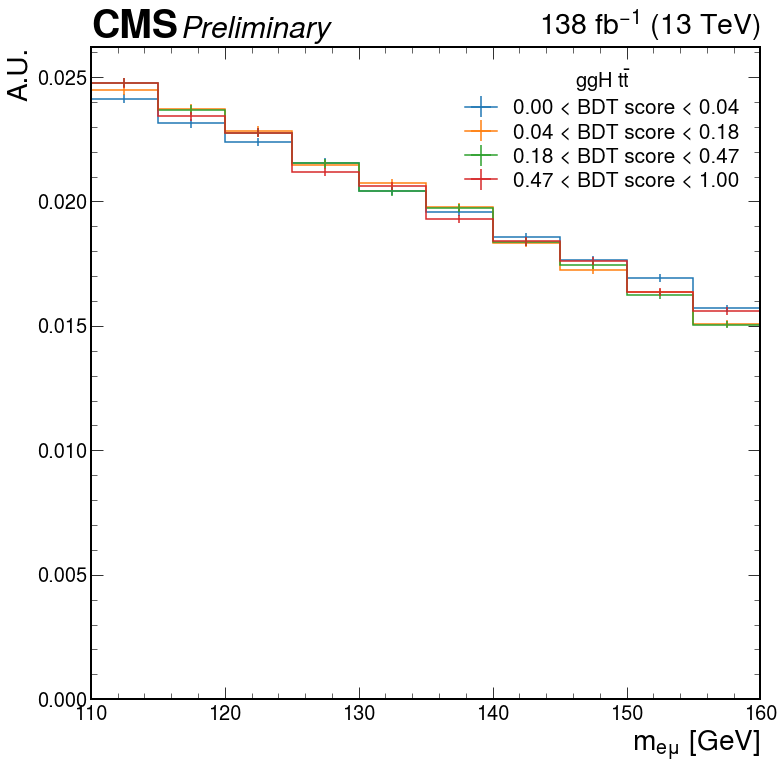

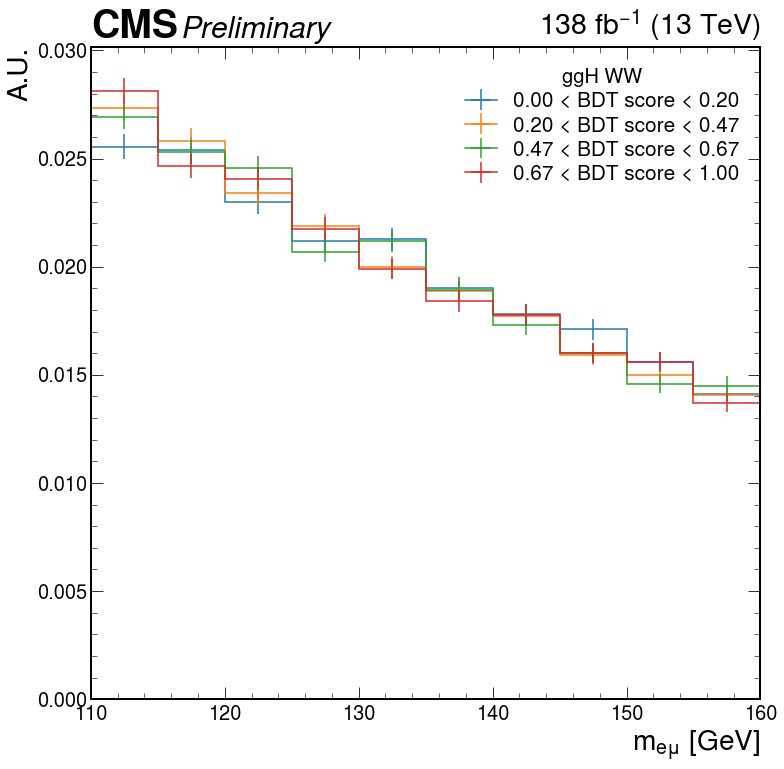

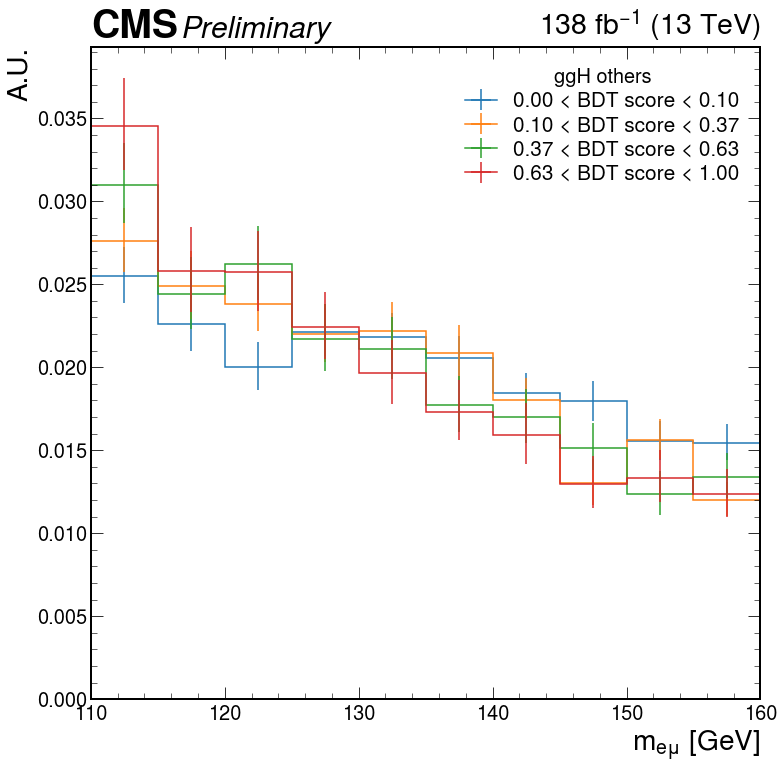

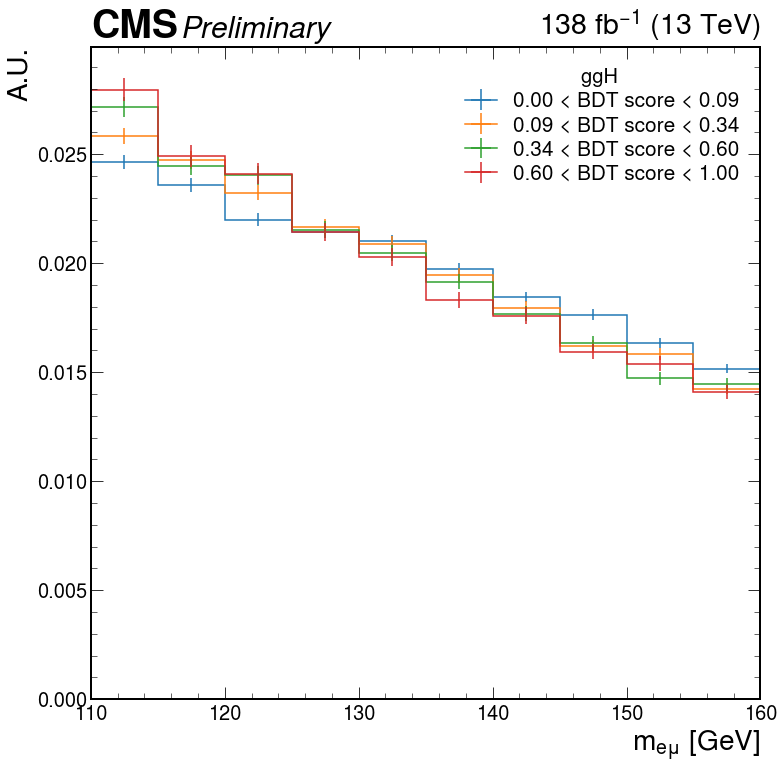

In [14]:
from coffea import hist
import mplhep
import matplotlib.pyplot as plt
catcatcat2='ggH'
#feature_names = ['njets', 'met', 'DeltaEta_e_m', 'empt', 'DeltaPhi_em_met', 'j1pt', 'j1Eta', 'DeltaEta_j1_j2', 'j1_j2_mass', 'DeltaEta_j1_em', 'Ht_had', 'Rpt', 'j2pt', 'pt_cen_Deltapt']
keep = feature_names+['weight', 'sample', 'e_m_Mass']
#Get the background
data_all = df[(df['label']==0)&(df['isVBFcat']==0)&(df['mtrigger']==1)][keep]
#model = xgb.XGBClassifier()
#model.load_model(f'./results/model_GG.json')
data_all['mva'] = model.predict_proba(data_all[feature_names])[:,1]
for subsample, ind in subsamples.items():
    data_bkg = data_all[data_all['sample'].isin(ind)]
    #Get 20% quantiles of the background
    from statsmodels.stats.weightstats import DescrStatsW
    wq = DescrStatsW(data=data_bkg['mva'], weights=data_bkg['weight'])
    quantiles = wq.quantile(probs=np.array([0, 0.25, 0.50, 0.75, 1]), return_pandas=False)
    #Fill in sliced invariant mass according to MVA quantiles
    h_quan = hist.Hist('A.U.', hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 10, 110, 160), hist.Cat("sample", "sample"))
    #scales = {}
    quantiles[0] = 0
    quantiles[-1] = 1.001
    print(quantiles)
    print(data_bkg['weight'].sum())
    for i in range(len(quantiles)-1):
        quant25 = data_bkg[(data_bkg['mva']<quantiles[i+1])&(data_bkg['mva']>=quantiles[i])]
        print(quant25['weight'].sum())
        label = f'{quantiles[i]:.2f} < BDT score < {quantiles[i+1]:.2f}'
        h_quan.fill(e_m_Mass=quant25['e_m_Mass'].to_numpy(), sample=label, weight=quant25['weight'].to_numpy())
        #scales[label] = 1/np.sum(quant25['weight'].to_numpy())

    #h_quan.scale(scales, axis='sample')

    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 30,
        'axes.titlesize': 24,
        'axes.labelsize': 28,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.title_fontsize': 20
    })

    fig = plt.figure(
            figsize=(12,12),
          )

    ax = hist.plot1d(h_quan, density=True)
    #ax.set_ylim(0, 0.05)
    leg = ax.legend(fontsize='x-small', labelspacing=0.25, title=catcatcat2+' '+subsample)

    lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)
    fig.savefig(f'plots/BDTValid/{catcatcat}_{subsample}_bkg.png')
    # plt.text(0.5, 15, f'$\chi^{2}$ p-value for background (signal) = {p_bkg:.3f} ({p_sig:.3f})', 
    #          fontsize=20,
    #          horizontalalignment='center',
    #          verticalalignment='top')


In [ ]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2016preVFP', '2017', '2016postVFP','2018']
var_dict = {}
for year in years:
    print(f'Processing {year}')
    for subsample in ['signal','signalAlt']:
        result = load(f"../results/{year}/makeDF/output_testv9_{subsample}.coffea")
        if isinstance(result,tuple):
            result = result[0]
        for varName in result:
            if varName in var_dict:
                var_dict[varName] = np.append(var_dict[varName],result[varName].value)
            else:
                var_dict[varName] = result[varName].value
df_sig = pd.DataFrame(var_dict).drop(['is2016preVFP', 'is2016postVFP', 'is2017', 'is2018'], axis=1)
df_sig = df_sig[(df_sig['opp_charge']==1)&(df_sig.isVBFcat==0)].drop(['opp_charge'], axis=1)


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/tmp/ipykernel_488374/21912504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_125['mva'] = model.predict_proba(data_125[feature_names])[:,1]
/tmp/ipykernel_488374/21912504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_120['mva

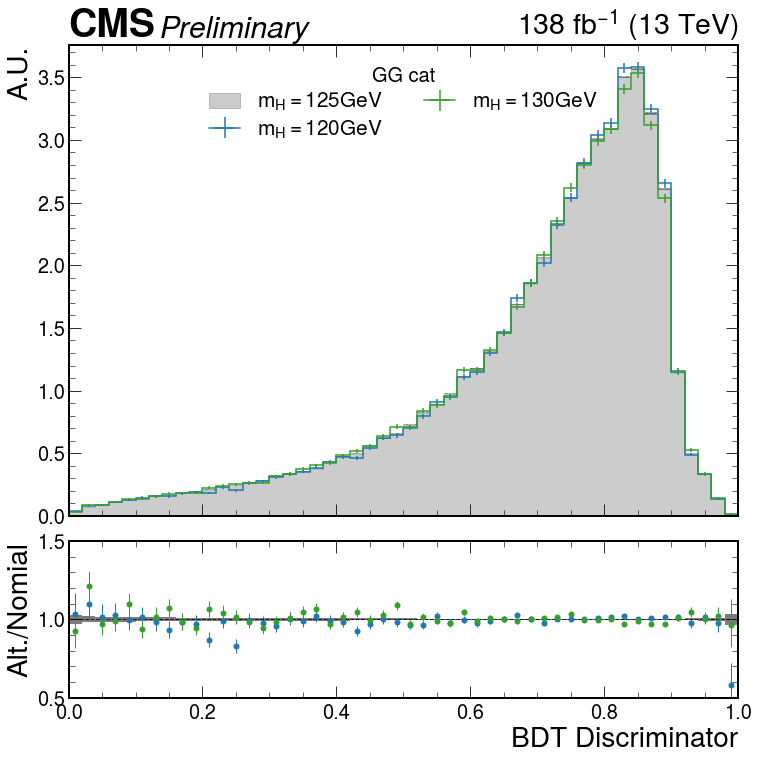

In [41]:
data_125 = df_sig[(df_sig['label']==1)]

data_110 = df_sig[(df_sig['label']==110)]
data_120 = df_sig[(df_sig['label']==120)]
data_130 = df_sig[(df_sig['label']==130)]
data_140 = df_sig[(df_sig['label']==140)]
data_150 = df_sig[(df_sig['label']==150)]
data_160 = df_sig[(df_sig['label']==160)]

data_125['mva'] = model.predict_proba(data_125[feature_names])[:,1]
data_110['mva'] = model.predict_proba(data_110[feature_names])[:,1]
data_120['mva'] = model.predict_proba(data_120[feature_names])[:,1]
data_130['mva'] = model.predict_proba(data_130[feature_names])[:,1]
data_140['mva'] = model.predict_proba(data_140[feature_names])[:,1]
data_150['mva'] = model.predict_proba(data_150[feature_names])[:,1]
data_160['mva'] = model.predict_proba(data_160[feature_names])[:,1]

binning = 50
h_mass = hist.Hist('A.U.', hist.Bin('MVA', 'BDT Discriminator', binning, 0, 1), hist.Cat("sample", "sample"))

h_mass.fill(MVA=data_125['mva'].to_numpy(), sample='$m_{H}=125$GeV', weight=data_125['weight'].to_numpy())

h_mass.fill(MVA=data_110['mva'].to_numpy(), sample='$m_{H}=110$GeV', weight=data_110['weight'].to_numpy())
h_mass.fill(MVA=data_120['mva'].to_numpy(), sample='$m_{H}=120$GeV', weight=data_120['weight'].to_numpy())
h_mass.fill(MVA=data_130['mva'].to_numpy(), sample='$m_{H}=130$GeV', weight=data_130['weight'].to_numpy())
h_mass.fill(MVA=data_140['mva'].to_numpy(), sample='$m_{H}=140$GeV', weight=data_140['weight'].to_numpy())
h_mass.fill(MVA=data_150['mva'].to_numpy(), sample='$m_{H}=150$GeV', weight=data_150['weight'].to_numpy())
h_mass.fill(MVA=data_160['mva'].to_numpy(), sample='$m_{H}=160$GeV', weight=data_160['weight'].to_numpy())

scales = {
            '$m_{H}=125$GeV': binning/np.sum(data_125['weight'].to_numpy()),
            '$m_{H}=110$GeV': binning/np.sum(data_110['weight'].to_numpy()),
            '$m_{H}=120$GeV': binning/np.sum(data_120['weight'].to_numpy()),
            '$m_{H}=130$GeV': binning/np.sum(data_130['weight'].to_numpy()),
            '$m_{H}=140$GeV': binning/np.sum(data_140['weight'].to_numpy()),
            '$m_{H}=150$GeV': binning/np.sum(data_150['weight'].to_numpy()),
            '$m_{H}=160$GeV': binning/np.sum(data_160['weight'].to_numpy()),
        }

h_mass.scale(scales, axis='sample')

import mplhep
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use(mplhep.style.CMS)
plt.rcParams.update({
    'font.size': 30,
    'axes.titlesize': 24,
    'axes.labelsize': 28,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.title_fontsize': 20
})

#For ratio plots
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(12,12),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)

fig.subplots_adjust(hspace=.08)

error_opts = {
    'label': '',
    'hatch': '///',
    'facecolor': 'k',
    'alpha': 0.3,
    'edgecolor': (0,0,0,.5),
    'linewidth': 0
}

hist.plot1d(
    h_mass[:,'$m_{H}=125$GeV'],
    ax=ax,
    overlay='sample',
    stack=True,
    clear=False,
    fill_opts={'edgecolor': (0,0,0,0.3), 'alpha': 0.2, 'facecolor': 'k'},
    error_opts=error_opts,
)

from cycler import cycler
colors = ['#1f78b4','#33a02c']
ax.set_prop_cycle(cycler(color=colors))

hist.plot1d(h_mass[:,['$m_{H}=110$GeV', '$m_{H}=120$GeV','$m_{H}=130$GeV', '$m_{H}=140$GeV','$m_{H}=150$GeV', '$m_{H}=160$GeV']], ax=ax, clear=False)
ax.set_xlabel(None)

leg = ax.legend(fontsize='x-small', labelspacing=0.25, ncol=2, loc=9, title=catcatcat2)

data_err_opts = [{
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': i,
            'elinewidth': 1,
        } for i in colors]



hist.plotratio(
    num=h_mass[:,'$m_{H}=110$GeV'].sum('sample'),
    denom=h_mass[:,'$m_{H}=125$GeV'].sum('sample'),
    ax=rax,
    error_opts=data_err_opts[0],
    denom_fill_opts={},
    guide_opts={},
    unc='num',
    clear=False
)

hist.plotratio(
    num=h_mass[:,'$m_{H}=120$GeV'].sum('sample'),
    denom=h_mass[:,'$m_{H}=125$GeV'].sum('sample'),
    ax=rax,
    error_opts=data_err_opts[1],
    denom_fill_opts={},
    guide_opts={},
    unc='num',
    clear=False
)

hist.plotratio(
    num=h_mass[:,'$m_{H}=130$GeV'].sum('sample'),
    denom=h_mass[:,'$m_{H}=125$GeV'].sum('sample'),
    ax=rax,
    error_opts=data_err_opts[2],
    denom_fill_opts={},
    guide_opts={},
    unc='num',
    clear=False
)

hist.plotratio(
    num=h_mass[:,'$m_{H}=140$GeV'].sum('sample'),
    denom=h_mass[:,'$m_{H}=125$GeV'].sum('sample'),
    ax=rax,
    error_opts=data_err_opts[3],
    denom_fill_opts={},
    guide_opts={},
    unc='num',
    clear=False
)

hist.plotratio(
    num=h_mass[:,'$m_{H}=150$GeV'].sum('sample'),
    denom=h_mass[:,'$m_{H}=125$GeV'].sum('sample'),
    ax=rax,
    error_opts=data_err_opts[4],
    denom_fill_opts={},
    guide_opts={},
    unc='num',
    clear=False
)

hist.plotratio(
    num=h_mass[:,'$m_{H}=160$GeV'].sum('sample'),
    denom=h_mass[:,'$m_{H}=125$GeV'].sum('sample'),
    ax=rax,
    error_opts=data_err_opts[5],
    denom_fill_opts={},
    guide_opts={},
    unc='num',
    clear=False
)
rax.set_xlim(0, 1)
rax.set_ylim(0.5, 1.5)
rax.set_ylabel("Alt./Nomial", loc='center')

lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)
fig.savefig(f'plots/BDTValid/{catcatcat}_sig.png')
# plt.text(0.5, 15, f'$\chi^{2}$ p-value for background (signal) = {p_bkg:.3f} ({p_sig:.3f})', 
#          fontsize=20,
#          horizontalalignment='center',
#          verticalalignment='top')



/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/tmp/ipykernel_1286823/2420035305.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sig['mva'] = model.predict_proba(data_sig[feature_names])[:,1]


[0.         0.53774327 0.69048315 0.78618181 0.86106879 1.001     ]
4973.87081183177
4973.8763260410715
4973.857281466702
4973.954152895423
4973.897084648742


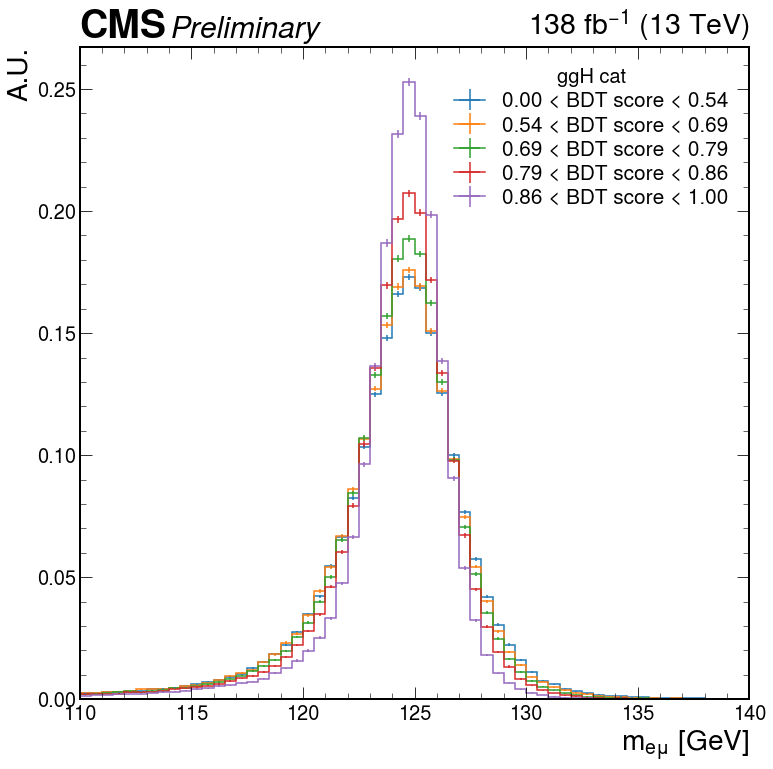

In [26]:
from coffea import hist
catcatcat2 = 'ggH cat'
catcatcat = 'vbf'
#Get the signal
data_sig = df[(df['label']==1)&(df['isVBFcat']==0)]
data_sig['mva'] = model.predict_proba(data_sig[feature_names])[:,1]
#Get 20% quantiles of the background
from statsmodels.stats.weightstats import DescrStatsW
wq = DescrStatsW(data=data_sig['mva'], weights=data_sig['weight'])
#quantiles = wq.quantile(probs=np.array([0, 0.1, 0.2, 0.3, 0.40, 0.5, 0.6, 0.7, 0.8, 0.9, 1]), return_pandas=False)
quantiles = wq.quantile(probs=np.array([0, 0.20, 0.40, 0.60, 0.80, 1]), return_pandas=False)
#quantiles = wq.quantile(probs=np.array([0, 0.25, 0.50, 0.75, 1]), return_pandas=False)
quantiles[0] = 0
quantiles[-1] = 1.001
print(quantiles)

#Fill in sliced invariant mass according to MVA quantiles
h_quan = hist.Hist('A.U.', hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 60, 110, 140), hist.Cat("sample", "sample"))
#scales = {}
#quantiles = [0,0.25,0.5,0.75,1]
for i in range(len(quantiles)-1):
    quant25 = data_sig[(data_sig['mva']<quantiles[i+1])&(data_sig['mva']>=quantiles[i])]
    print(quant25['weight'].sum())
    label = f'{quantiles[i]:.2f} < BDT score < {quantiles[i+1]:.2f}'
    h_quan.fill(e_m_Mass=quant25['e_m_Mass'].to_numpy(), sample=label, weight=quant25['weight'].to_numpy())
    #scales[label] = 1/np.sum(quant25['weight'].to_numpy())

#h_quan.scale(scales, axis='sample')

import mplhep
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use(mplhep.style.CMS)
plt.rcParams.update({
    'font.size': 30,
    'axes.titlesize': 24,
    'axes.labelsize': 28,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.title_fontsize': 20
})

fig = plt.figure(
        figsize=(12,12),
      )

ax = hist.plot1d(h_quan, density=True)
#ax.set_ylim(0, 0.05)
leg = ax.legend(fontsize='x-small', labelspacing=0.25, title=catcatcat2)

lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)
#fig.savefig(f'plots/BDTValid/{catcatcat}_sig.png')



In [44]:
#Save model if everything looks good
model_out_file = "results/model_GG.json"
#model.save_model(model_out_file)

In [4]:
from statsmodels.stats.weightstats import DescrStatsW
df0, df1, df2 = df[0], df[1], df[2][df[2]['isVBFcat']==0]
df_vbf = pd.concat([df0,df1,df2], axis=0, ignore_index=True)
final_model = xgb.XGBClassifier()
final_model.load_model('results/model_GG.json')
df_vbf['mva'] = final_model.predict_proba(df_vbf[feature_names])[:,1]
wq = DescrStatsW(data=df_vbf['mva'], weights=df_vbf['weight'])
quantiles = wq.quantile(probs=np.linspace(0,1,101), return_pandas=False)
quantiles[0], quantiles[-1] = 0, 1
for i in range(1,len(quantiles)):
    if quantiles[i] <= quantiles[i-1]:
        print('hi')
        quantiles[i] = quantiles[i-1]+1e-17
np.set_printoptions(precision=20)
print(quantiles)
quantiles.dump(f"../results/SenScan/GGcat_quantiles")

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[0.                    0.0017276149010285735 0.002382695209234953
 0.0031183462124317884 0.004046349320560694  0.005211767740547657
 0.006801965646445751  0.008656306192278862  0.010601353831589222
 0.012711231596767902  0.014948074705898762  0.01737743802368641
 0.020346011966466904  0.023874014616012573  0.02801966853439808
 0.03318556025624275   0.03897596150636673   0.04554981738328934
 0.05272246524691582   0.06027361750602722   0.0687204897403717
 0.07761586457490921   0.08754538744688034   0.09791919589042664
 0.10918904095888138   0.12106280028820038   0.13392001390457153
 0.14780771732330322   0.16265475749969482   0.1778595745563507
 0.1943933516740799    0.21034210920333862   0.22824156284332275
 0.24512216448783875   0.26325517892837524   0.2813694179058075
 0.29921871423721313   0.3165397346019745    0.3344483971595764
 0.35223090648651123   0.3710480332374573    0.3888131082057953
 0.40601107478141785   0.4230158030986786    0.4392596483230591
 0.4547537565231323    0.470